# **Projet : Prédiction de la défaillance de paiement de cartes de crédit**

## 1. Contexte du projet
Dans le cadre d’une institution bancaire, l’objectif est de mieux gérer le risque de crédit. Nous disposons d’un jeu de données issu de l’UCI Machine Learning Repository intitulé **“Default of Credit Card Clients”**.  
Ce jeu de données contient 30 000 observations de clients et 23 variables explicatives (caractéristiques démographiques, historiques de remboursement, montants de factures, etc.). La variable cible (**Y**) indique si le client fera défaut (1) ou non (0) le mois suivant.

L’enjeu principal est **la détection et la prédiction du risque de défaut de paiement** afin de :
- Mieux évaluer la solvabilité des clients.
- Réduire les pertes financières liées aux défauts de paiement.
- Affiner les décisions stratégiques sur l’octroi de crédit.

## 2. Objectifs
1. **Analyser et comprendre les données** (exploration, distributions, corrélations).
2. **Renommer les variables** pour une meilleure lisibilité (en remplaçant `X1`, `X2`, etc. par leurs noms respectifs).
3. **Mettre en place des modèles de classification** pour prédire le risque de défaut (Logistic Regression, Random Forest, etc.).
4. **Comparer les performances** de différents modèles (précision, AUC, f1-score, etc.).
5. **Formuler des recommandations stratégiques** pour l’octroi de crédit.

## 3. Présentation du jeu de données

- **Taille** : 30 000 observations.
- **Caractéristiques** :  
  - `ID` : Identifiant unique du client.  
  - `LIMIT_BAL` : Montant du crédit accordé (en NT dollars).  
  - `SEX` : Genre (1 = homme, 2 = femme).  
  - `EDUCATION` : Niveau d’éducation (1 = graduate school, 2 = university, 3 = high school, 4 = autres).  
  - `MARRIAGE` : Statut marital (1 = marié, 2 = célibataire, 3 = autres).  
  - `AGE` : Âge du client (en années).  
  - `PAY_0` à `PAY_6` : Historique de paiement (du mois le plus récent au plus ancien). Les valeurs peuvent être -1 (payé à temps), 1 (retard 1 mois), 2 (retard 2 mois), …, 9 (retard 9 mois ou plus).  
  - `BILL_AMT1` à `BILL_AMT6` : Montant de la facture pour chacun des 6 derniers mois.  
  - `PAY_AMT1` à `PAY_AMT6` : Montant payé pour chacun des 6 derniers mois.  
  - `Y` (target) : Indicateur de défaut de paiement le mois suivant (0 = non, 1 = oui).  

Aucune valeur manquante n’est signalée dans ce dataset d’après la description UCI.

## 4. Schéma du projet
1. **Importation des librairies et des données**  
2. **Renommage des colonnes**  
3. **Exploration et visualisation des données**  
4. **Prétraitement** (éventuel encodage, normalisation ou autres transformations si nécessaire)  
5. **Séparation Training/Test**  
6. **Modélisation** (Logistic Regression, Random Forest, etc.)  
7. **Évaluation des performances** (matrice de confusion, scores de classification, AUC)  
8. **Sélection du meilleur modèle** et **recommandations**  

---




In [242]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Méthodologie : Étapes CRISP-DM

Ce document présente le déroulement du projet en suivant la méthodologie CRISP-DM, avec des **questions** spécifiques pour chaque étape, le **code** Python associé et des **réponses** basées sur l’analyse des données.

---

## 1. Compréhension du contexte et des données!!!


## Step 1 : Data Understanding

In [243]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
default_of_credit_card_clients = fetch_ucirepo(id=350) 
  
# data (as pandas dataframes) 
X = default_of_credit_card_clients.data.features 
y = default_of_credit_card_clients.data.targets 
  
# metadata 
print(default_of_credit_card_clients.metadata) 
  
# variable informatiAon 
print(default_of_credit_card_clients.variables) 


{'uci_id': 350, 'name': 'Default of Credit Card Clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 365, 'type': 'NATIVE', 'title': 'The comparisons of data mining techniques for the predictive accuracy of 

In [244]:

data = pd.concat([X, y], axis=1)
print("Dimensions du dataset :", data.shape)
data.head()

Dimensions du dataset : (30000, 24)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [245]:

col_map = {
    'X1':  'LIMIT_BAL',
    'X2':  'SEX',
    'X3':  'EDUCATION',
    'X4':  'MARRIAGE',
    'X5':  'AGE',
    'X6':  'PAY_0',
    'X7':  'PAY_2',
    'X8':  'PAY_3',
    'X9':  'PAY_4',
    'X10': 'PAY_5',
    'X11': 'PAY_6',
    'X12': 'BILL_AMT1',
    'X13': 'BILL_AMT2',
    'X14': 'BILL_AMT3',
    'X15': 'BILL_AMT4',
    'X16': 'BILL_AMT5',
    'X17': 'BILL_AMT6',
    'X18': 'PAY_AMT1',
    'X19': 'PAY_AMT2',
    'X20': 'PAY_AMT3',
    'X21': 'PAY_AMT4',
    'X22': 'PAY_AMT5',
    'X23': 'PAY_AMT6',
    'Y':   'DEFAULT_NEXT_MONTH'
}


data = data.rename(columns=col_map)


if 'ID' in data.columns:
    data = data.drop('ID', axis=1, errors='ignore')

data.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_NEXT_MONTH
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


##  1.1 Quelles informations générales peut-on obtenir sur les variables ?

In [246]:

display(X.info())
display(X.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      30000 non-null  int64
 1   X2      30000 non-null  int64
 2   X3      30000 non-null  int64
 3   X4      30000 non-null  int64
 4   X5      30000 non-null  int64
 5   X6      30000 non-null  int64
 6   X7      30000 non-null  int64
 7   X8      30000 non-null  int64
 8   X9      30000 non-null  int64
 9   X10     30000 non-null  int64
 10  X11     30000 non-null  int64
 11  X12     30000 non-null  int64
 12  X13     30000 non-null  int64
 13  X14     30000 non-null  int64
 14  X15     30000 non-null  int64
 15  X16     30000 non-null  int64
 16  X17     30000 non-null  int64
 17  X18     30000 non-null  int64
 18  X19     30000 non-null  int64
 19  X20     30000 non-null  int64
 20  X21     30000 non-null  int64
 21  X22     30000 non-null  int64
 22  X23     30000 non-null  int64
dtypes: int64(23

None

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


## 1.2 Gestion des Valeurs Manquantes

Selon la description UCI, il n’y a pas de valeurs manquantes dans ce dataset.

In [247]:

missing_counts = data.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_counts)

from sklearn.impute import SimpleImputer

num_cols = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3',
            'BILL_AMT4','BILL_AMT5','BILL_AMT6',
            'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']


imputer = SimpleImputer(strategy='mean')
data[num_cols] = imputer.fit_transform(data[num_cols])


Valeurs manquantes par colonne :
 LIMIT_BAL             0
SEX                   0
EDUCATION             0
MARRIAGE              0
AGE                   0
PAY_0                 0
PAY_2                 0
PAY_3                 0
PAY_4                 0
PAY_5                 0
PAY_6                 0
BILL_AMT1             0
BILL_AMT2             0
BILL_AMT3             0
BILL_AMT4             0
BILL_AMT5             0
BILL_AMT6             0
PAY_AMT1              0
PAY_AMT2              0
PAY_AMT3              0
PAY_AMT4              0
PAY_AMT5              0
PAY_AMT6              0
DEFAULT_NEXT_MONTH    0
dtype: int64


## Step 2 :  Data Preparation 


## Comment gérer les valeurs manquantes ?

In [248]:

df = X.copy()


threshold = 0.4  

missing_values_percent = (df.isna().sum() / len(df)) * 100
cols_to_drop = missing_values_percent[missing_values_percent > (threshold*100)].index

df.drop(columns=cols_to_drop, inplace=True)

for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include=[object]).columns:
    df[col] = df[col].fillna(df[col].value_counts().idxmax())

print("Colonnes supprimées :", cols_to_drop)
print("Valeurs manquantes après traitement :", df.isna().sum().sum())


Colonnes supprimées : Index([], dtype='object')
Valeurs manquantes après traitement : 0


## Comment détecter et traiter les valeurs aberrantes (outliers) ?

In [249]:
target_col = 'DEFAULT_NEXT_MONTH'  # Ajustez si nécessaire

# 1. Sélection des colonnes numériques hors variable cible
numeric_cols = data.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop(target_col, errors='ignore')  # retire la cible des colonnes numériques

# 2. Calcul des limites d’outliers par la méthode IQR
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Construction du masque booléen (True si la valeur est un outlier)
outliers_bool = (data[numeric_cols] < lower_bound) | (data[numeric_cols] > upper_bound)

# 4. Les lignes sans outlier sont celles pour lesquelles aucune colonne n’est en dehors des limites
mask_no_outliers = ~outliers_bool.any(axis=1)

# 5. Filtrage du DataFrame original
df_no_outliers = data[mask_no_outliers]

print("Dimensions initiales :", data.shape)
print("Dimensions après suppression des outliers :", df_no_outliers.shape)

Dimensions initiales : (30000, 24)
Dimensions après suppression des outliers : (12933, 24)


## 2.4 Élimination des Variables Insignifiantes

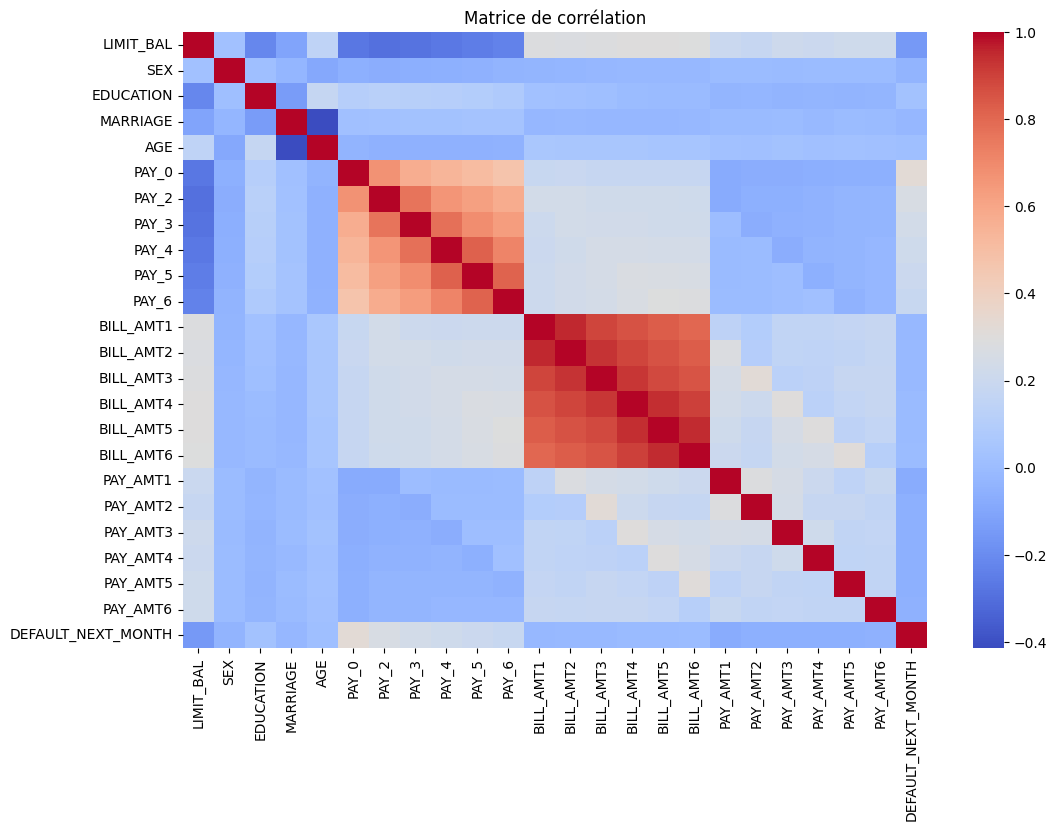

In [250]:
corr = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

## 2.5 Normalisation et Standardisation des Variables Numériques 

In [205]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = df.select_dtypes(include=[np.number]).columns

df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

df_scaled.describe().T


,count,mean,std,min,25%,50%,75%,max
X1,30000.0,-6.063298e-17,1.000017,-1.213794,-0.905498,-0.211833,0.558907,6.416528
X2,30000.0,2.330580e-16,1.000017,-1.234323,-1.234323,0.810161,0.810161,0.810161
X3,30000.0,6.252776e-17,1.000017,-2.344743,-1.079457,0.185828,0.185828,5.246970
X4,30000.0,-7.579123e-18,1.000017,-2.973147,-1.057295,0.858557,0.858557,2.774410
X5,30000.0,-1.856885e-16,1.000017,-1.571479,-0.812074,-0.161156,0.598248,4.720729
X6,30000.0,-1.894781e-17,1.000017,-1.764843,-0.874991,0.014861,0.014861,7.133674
X7,30000.0,4.926430e-17,1.000017,-1.558876,-0.723570,0.111736,0.111736,6.794184
X8,30000.0,-5.494864e-17,1.000017,-1.532192,-0.696663,0.138865,0.138865,6.823091
X9,30000.0,3.126388e-17,1.000017,-1.521944,-0.666599,0.188746,0.188746,7.031505
X10,30000.0,-3.031649e-17,1.000017,-1.530046,-0.647565,0.234917,0.234917,7.294767


# **Analyses Statistiques : Univariées, Bivariées et Multivariées**

Dans le cadre d’un projet d’analyse de données (ici, pour l’octroi de crédit ou tout autre contexte), il est essentiel de mener plusieurs types d’analyses statistiques avant de passer aux modèles prédictifs. Nous détaillons ci-dessous :

1. **Analyse univariée**  
2. **Analyse bivariée**  
3. **Analyse multivariée**  

À chaque étape, des exemples de code en Python seront fournis pour illustrer comment réaliser ces analyses avec des librairies courantes (*pandas*, *numpy*, *matplotlib*, *seaborn*, *scipy*, *statsmodels*, etc.).

---

 

 



In [206]:
from scipy.stats import shapiro, kstest, norm

## 1. Analyse Univariée

### 1.1 Calcul des Statistiques Descriptives
- **Objectif** : Résumer l’information contenue dans chaque variable numéraire par des indicateurs (moyenne, médiane, écart-type, min, max).  
- **Pour les variables catégorielles** : Distribution des fréquences (compter le nombre de modalités). 

In [207]:
print(df_no_outliers.describe())  

           LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count   12933.000000  12933.000000  12933.000000  12933.000000  12933.000000   
mean   150306.966674      1.617413      1.812882      1.553545     35.197015   
std    113298.300508      0.486038      0.698479      0.522622      8.926245   
min     10000.000000      1.000000      0.000000      0.000000     21.000000   
25%     50000.000000      1.000000      1.000000      1.000000     28.000000   
50%    120000.000000      2.000000      2.000000      2.000000     34.000000   
75%    210000.000000      2.000000      2.000000      2.000000     41.000000   
max    520000.000000      2.000000      3.000000      3.000000     60.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  12933.000000  12933.000000  12933.000000  12933.000000  12933.000000   
mean      -0.346014     -0.600789     -0.642078     -0.666125     -0.681280   
std        0.817219      0.791028      0.8

In [208]:
for col in df:
    print(f"--- Distribution de la variable {col} ---")
    print(df[col].value_counts(dropna=False))
    print("\n")

--- Distribution de la variable X1 ---
X1
50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: count, Length: 81, dtype: int64


--- Distribution de la variable X2 ---
X2
2    18112
1    11888
Name: count, dtype: int64


--- Distribution de la variable X3 ---
X3
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64


--- Distribution de la variable X4 ---
X4
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


--- Distribution de la variable X5 ---
X5
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52    

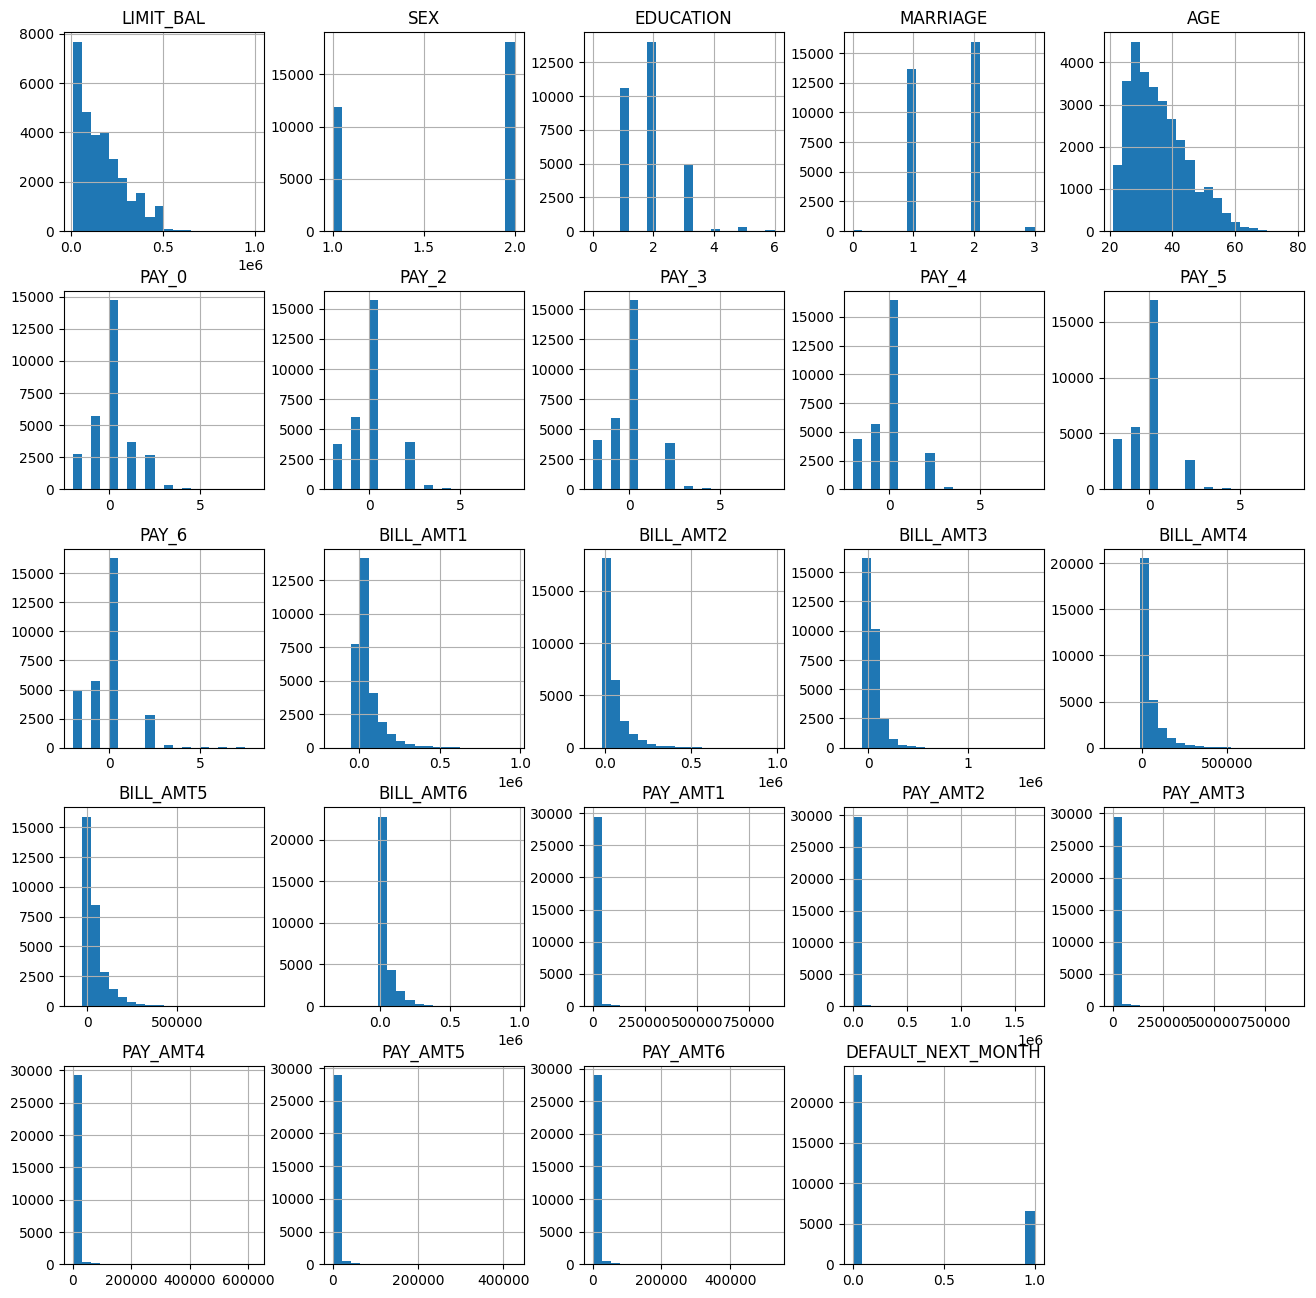

In [209]:
data.hist(figsize=(16, 16), bins=20)
plt.show()

In [210]:
# Discrétisation en 11 bins de taille égale
data['Categorie'] = pd.cut(data['PAY_AMT1']-data['BILL_AMT1'], bins=11, labels=[f'Bin_{i}' for i in range(1, 12)])

print(data['Categorie'])

0        Bin_7
1        Bin_7
2        Bin_6
3        Bin_6
4        Bin_7
         ...  
29995    Bin_5
29996    Bin_7
29997    Bin_7
29998    Bin_7
29999    Bin_6
Name: Categorie, Length: 30000, dtype: category
Categories (11, object): ['Bin_1' < 'Bin_2' < 'Bin_3' < 'Bin_4' ... 'Bin_8' < 'Bin_9' < 'Bin_10' < 'Bin_11']


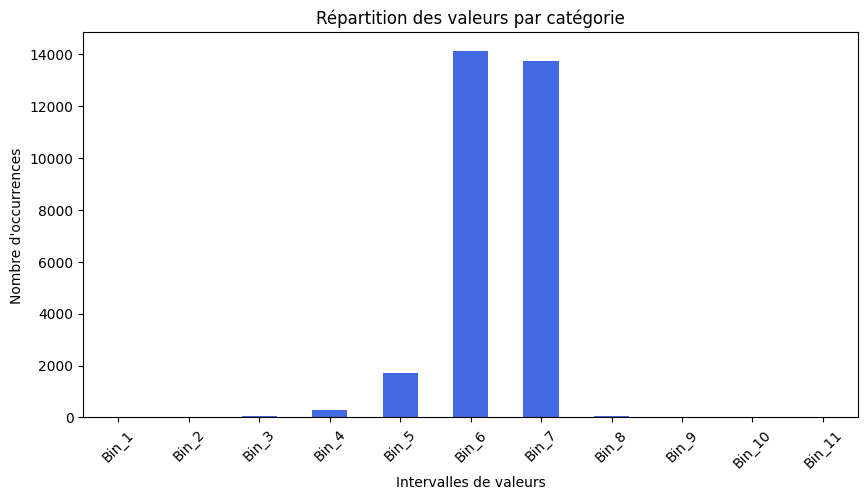

In [211]:
# Brouillon pour voir si on peut corréler l'écart entre du & payé avec le statut Payx
import matplotlib.pyplot as plt

# Compter le nombre d'occurrences dans chaque catégorie
data['Categorie'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='royalblue')

plt.xlabel("Intervalles de valeurs")
plt.ylabel("Nombre d'occurrences")
plt.title("Répartition des valeurs par catégorie")
plt.xticks(rotation=45)
plt.show()

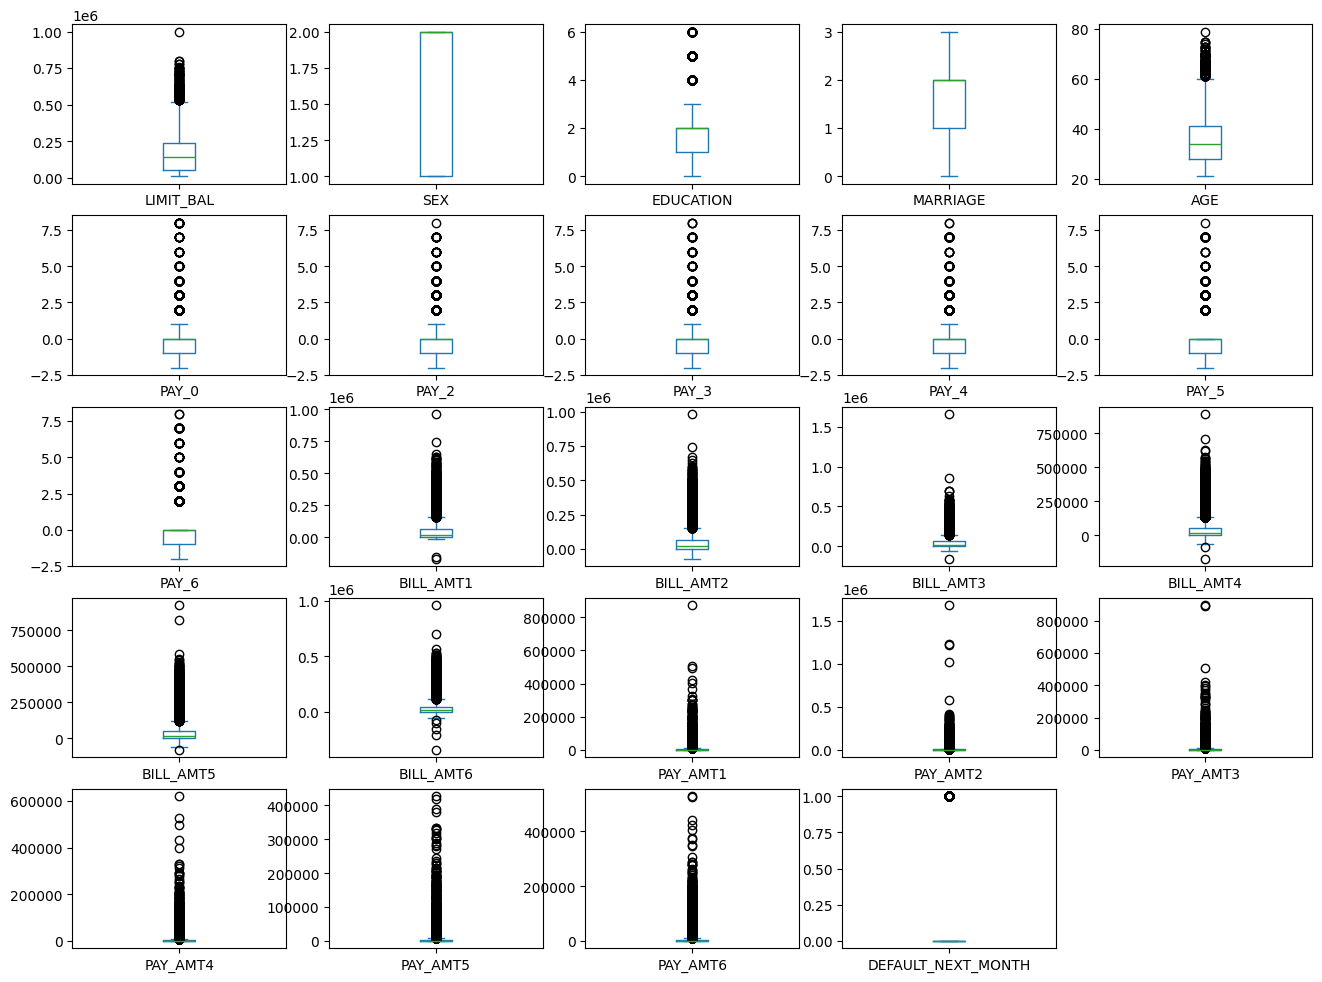

In [212]:
data.plot(kind='box', subplots=True, layout=(5, 5), figsize=(16, 12), sharex=False, sharey=False)
plt.show()

<Axes: xlabel='PAY_0', ylabel='None'>

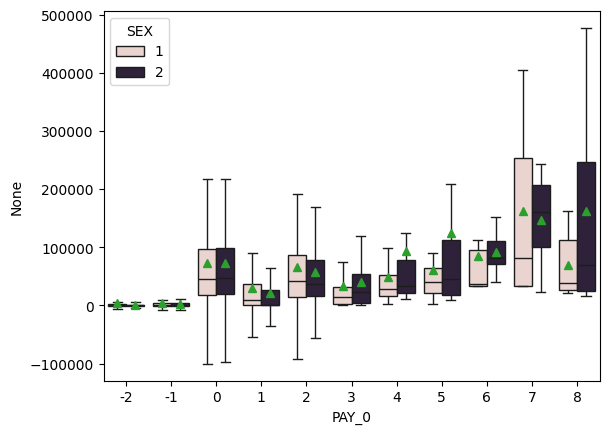

In [213]:
sns.boxplot(x='PAY_0', y=data.BILL_AMT1-data.PAY_AMT1,hue='SEX', data=data, showmeans=True, showfliers=False)

In [137]:
!pip install fitter

   ---------------------------------------- 0.0/61.6 kB ? eta -:--:--
   ---------------------------------------- 61.6/61.6 kB 1.7 MB/s eta 0:00:00


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,1.141703e-10,3051.188759,3076.115617,inf,0.069049,8.177693e-125
lognorm,1.194711e-10,3021.334713,3046.261571,inf,0.087121,1.447469e-198
expon,1.242732e-10,3026.050241,3042.668146,inf,0.080603,5.498734e-170
norm,1.656270e-10,3704.298153,3720.916058,inf,0.115113,0.000000e+00


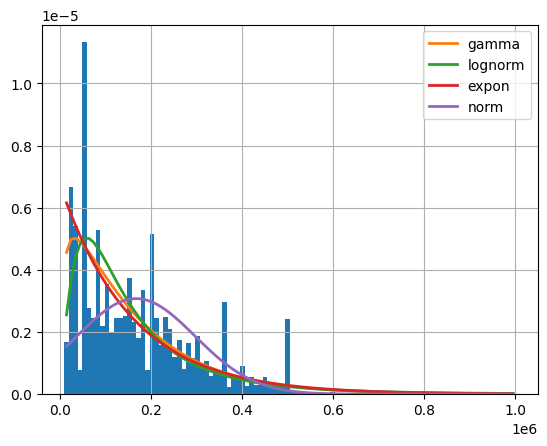

In [138]:
from fitter import Fitter

f = Fitter(data.LIMIT_BAL, distributions=['norm', 'expon', 'gamma', 'lognorm'])
f.fit()
f.summary()
# D'après le tableau on constate que les variables ne suivent ni loi de gamma / lognorm / exp / beta / norm

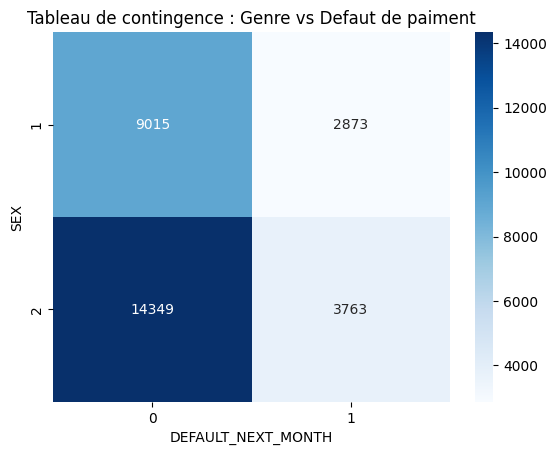

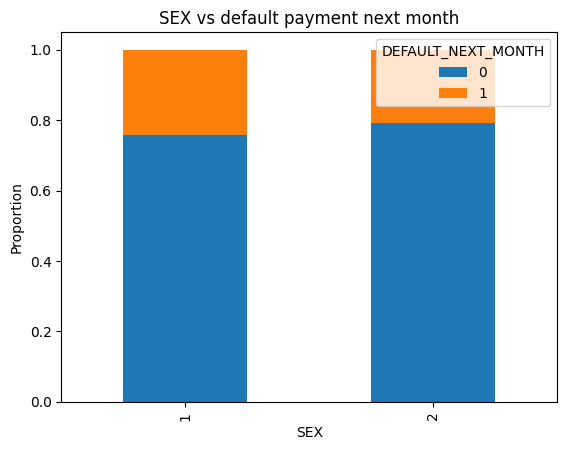

Statistique Khi-2 : 47.70879689062111
p-value : 4.944678999412044e-12
Degrés de liberté : 1
Tableau des fréquences attendues :
 [[ 9258.3744  2629.6256]
 [14105.6256  4006.3744]]


In [ ]:
from scipy.stats import chi2_contingency

# Tableau croisé entre défaut de payment et SEX
contingence_table = pd.crosstab(data['SEX'],data['DEFAULT_NEXT_MONTH'],)
sns.heatmap(contingence_table, annot=True, fmt='d', cmap='Blues')
plt.title("Tableau de contingence : Genre vs Defaut de paiment")
plt.show()
contingence_pct = contingence_table.div(contingence_table.sum(axis=1), axis=0)
contingence_pct.plot(kind='bar', stacked=True)
plt.title("SEX vs default payment next month")
plt.xlabel("SEX")
plt.ylabel("Proportion")
plt.show()
# On constate qu'on a plus d'homme qui ont payé puis de femme qui ont payé
# puis d'homme qui n'ont pas payé puis de femme qui n'ont payé
chi2, p, dof, expected = chi2_contingency(contingence_table)

print(f"Statistique Khi-2 : {chi2}")
print(f"p-value : {p}") # la pi value est inférieure à 0.05 donc il y'a une dépendance du défaut de paiment au sex
print(f"Degrés de liberté : {dof}")
print("Tableau des fréquences attendues :\n", expected)

In [144]:
from collections import Counter

counts = Counter(data['SEX'])
majority_class = max(counts.values())
minority_class = min(counts.values())
imbalance_ratio = majority_class / minority_class

print(f"Imbalance Ratio: {imbalance_ratio:.2f}") # ==> Le ratio Homme / femme est de 1.52

Imbalance Ratio: 1.52


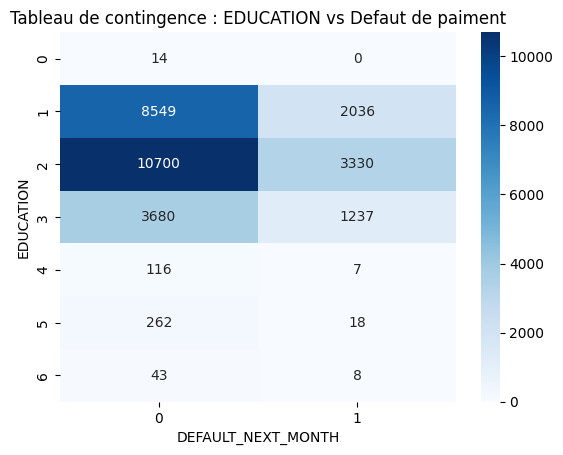

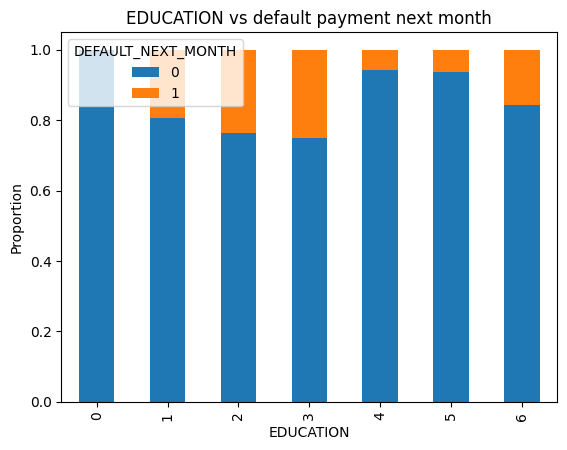

Statistique Khi-2 : 163.21655786997073
p-value : 1.2332626245415605e-32
Degrés de liberté : 6
Tableau des fréquences attendues :
 [[1.0903200e+01 3.0968000e+00]
 [8.2435980e+03 2.3414020e+03]
 [1.0926564e+04 3.1034360e+03]
 [3.8293596e+03 1.0876404e+03]
 [9.5792400e+01 2.7207600e+01]
 [2.1806400e+02 6.1936000e+01]
 [3.9718800e+01 1.1281200e+01]]


In [146]:
# Tableau croisé entre défaut de payment et EDUCATION
contingence_table = pd.crosstab(data['EDUCATION'],data['DEFAULT_NEXT_MONTH'],)
sns.heatmap(contingence_table, annot=True, fmt='d', cmap='Blues')
plt.title("Tableau de contingence : EDUCATION vs Defaut de paiment")
plt.show()
contingence_pct = contingence_table.div(contingence_table.sum(axis=1), axis=0)
contingence_pct.plot(kind='bar', stacked=True)
plt.title("EDUCATION vs default payment next month")
plt.xlabel("EDUCATION")
plt.ylabel("Proportion")
plt.show()
# On constate qu'on a plus d'homme qui ont payé puis de femme qui ont payé
# puis d'homme qui n'ont pas payé puis de femme qui n'ont payé
chi2, p, dof, expected = chi2_contingency(contingence_table)

print(f"Statistique Khi-2 : {chi2}")
print(f"p-value : {p}") # la pi value est inférieure à 0.05 donc il y'a une dépendance du défaut de paiment à l'EDUCATION
print(f"Degrés de liberté : {dof}")
print("Tableau des fréquences attendues :\n", expected)

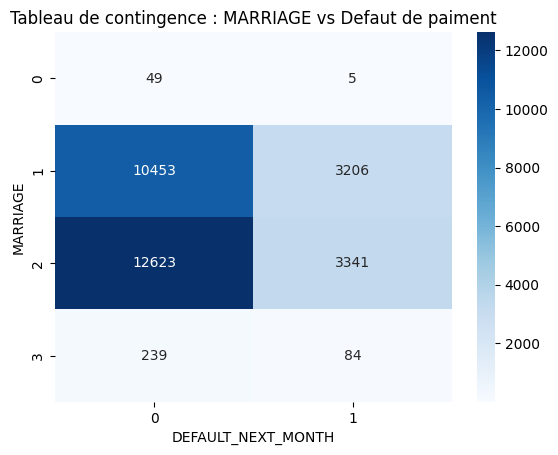

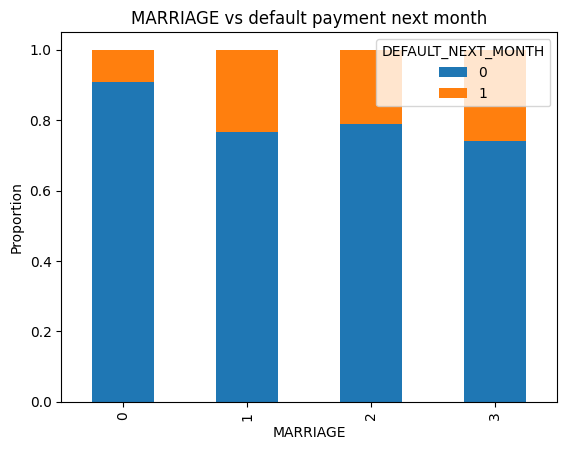

Statistique Khi-2 : 35.66239583433609
p-value : 8.825862457577375e-08
Degrés de liberté : 3
Tableau des fréquences attendues :
 [[4.20552000e+01 1.19448000e+01]
 [1.06376292e+04 3.02137080e+03]
 [1.24327632e+04 3.53123680e+03]
 [2.51552400e+02 7.14476000e+01]]


In [147]:
# Tableau croisé entre défaut de payment et MARRIAGE
contingence_table = pd.crosstab(data['MARRIAGE'],data['DEFAULT_NEXT_MONTH'],)
sns.heatmap(contingence_table, annot=True, fmt='d', cmap='Blues')
plt.title("Tableau de contingence : MARRIAGE vs Defaut de paiment")
plt.show()
contingence_pct = contingence_table.div(contingence_table.sum(axis=1), axis=0)
contingence_pct.plot(kind='bar', stacked=True)
plt.title("MARRIAGE vs default payment next month")
plt.xlabel("MARRIAGE")
plt.ylabel("Proportion")
plt.show()
# On constate qu'on a plus d'homme qui ont payé puis de femme qui ont payé
# puis d'homme qui n'ont pas payé puis de femme qui n'ont payé
chi2, p, dof, expected = chi2_contingency(contingence_table)

print(f"Statistique Khi-2 : {chi2}")
print(f"p-value : {p}") # la pi value est inférieure à 0.05 donc il y'a une dépendance du défaut de paiment au Marriage.
print(f"Degrés de liberté : {dof}")
print("Tableau des fréquences attendues :\n", expected)

### 1.2 Visualisation Univariée
- **Histogrammes** : Pour observer la distribution d’une variable numérique.  
- **Boxplots** : Pour détecter rapidement la présence d’outliers. 

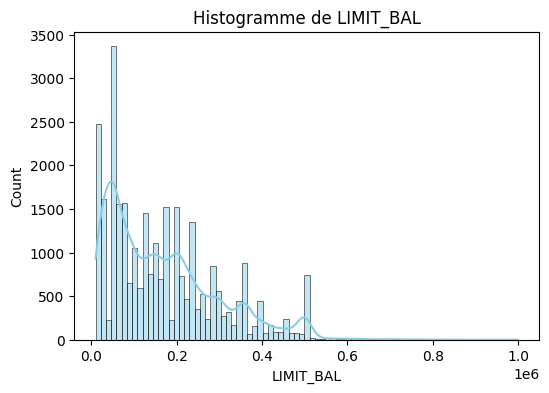

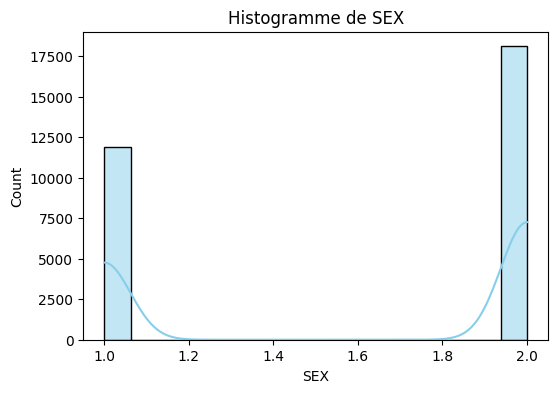

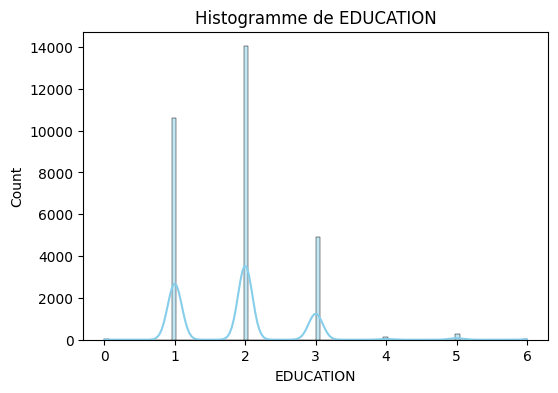

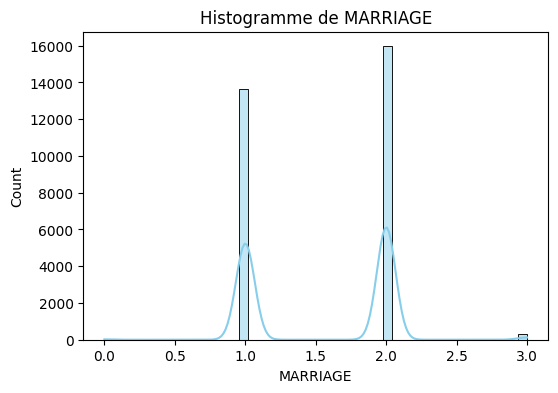

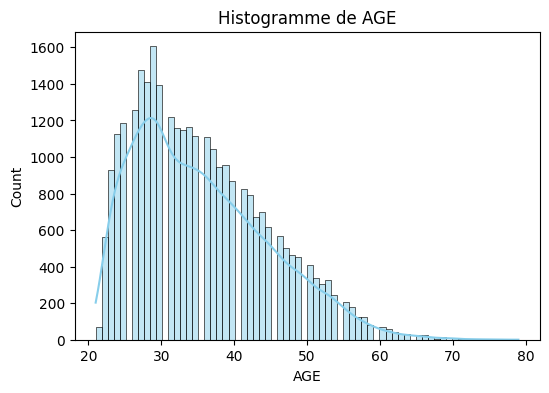

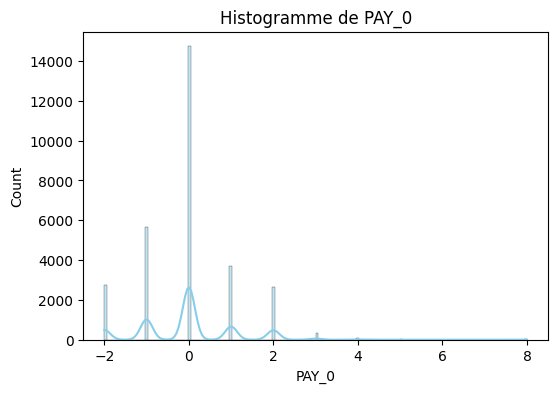

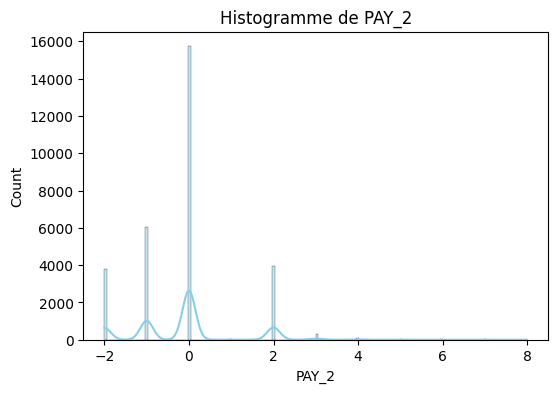

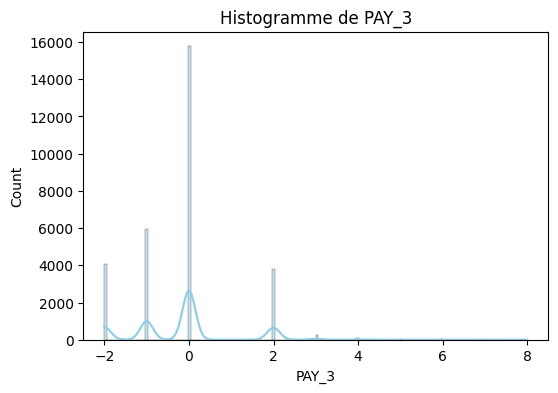

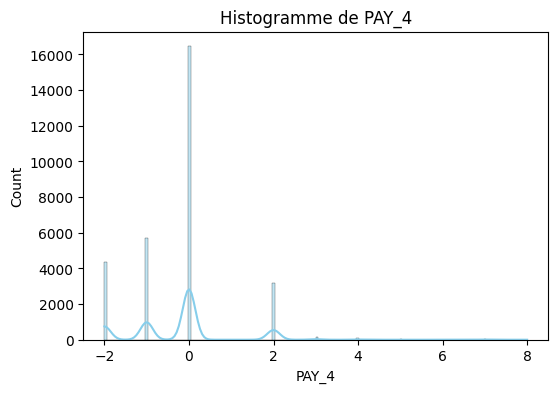

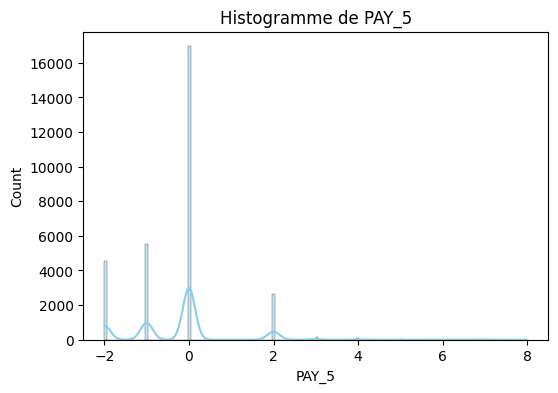

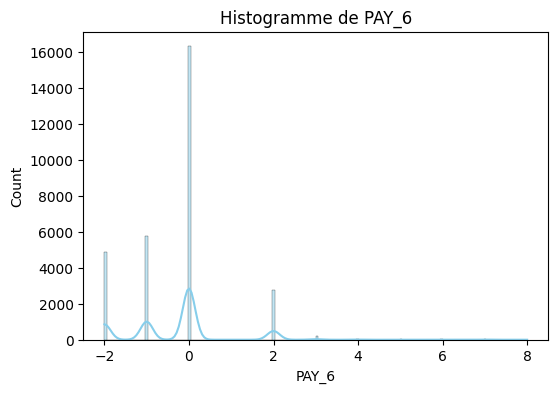

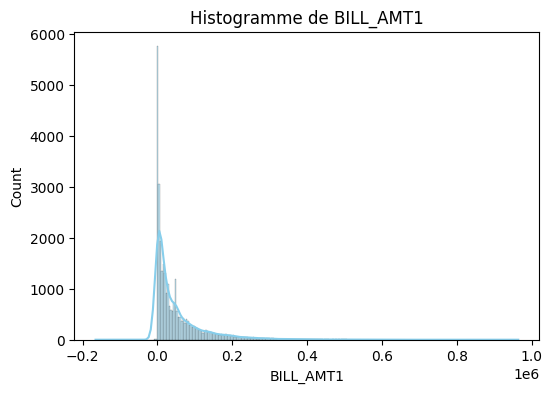

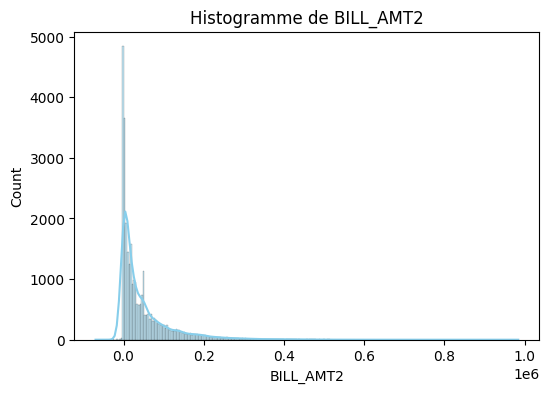

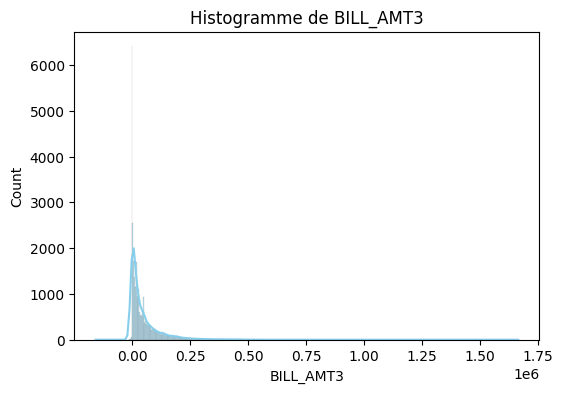

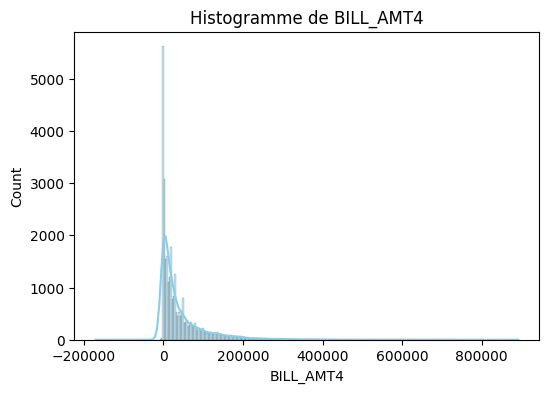

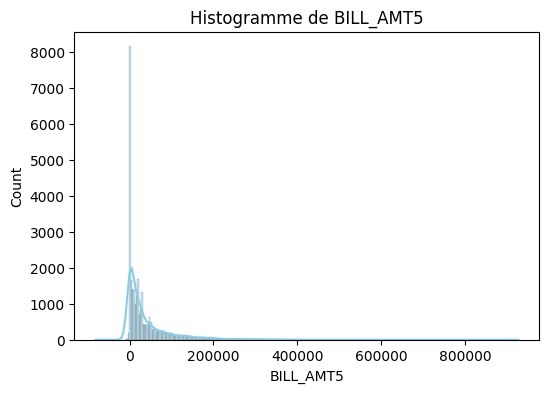

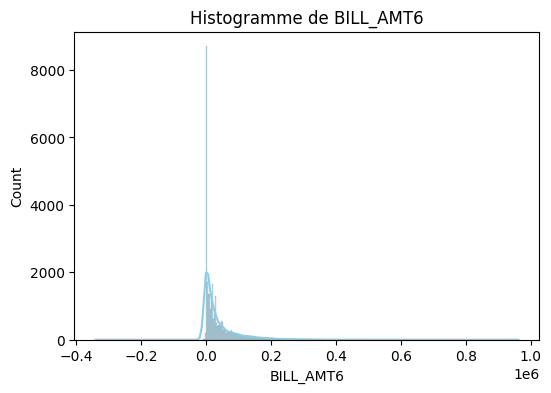

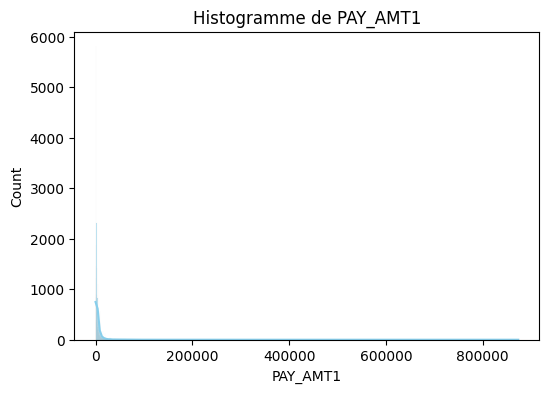

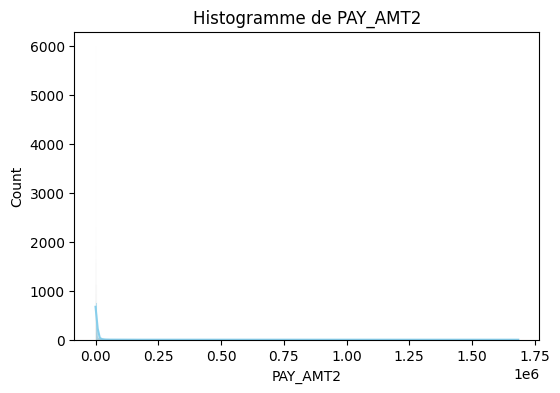

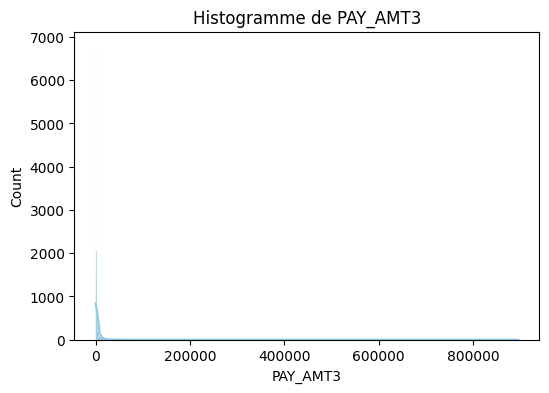

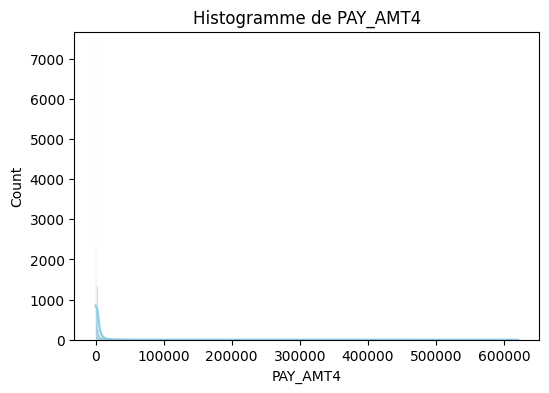

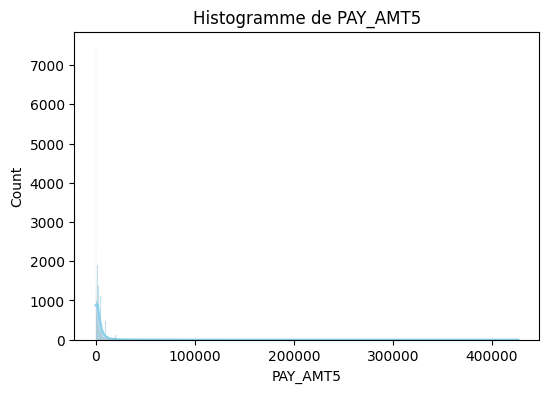

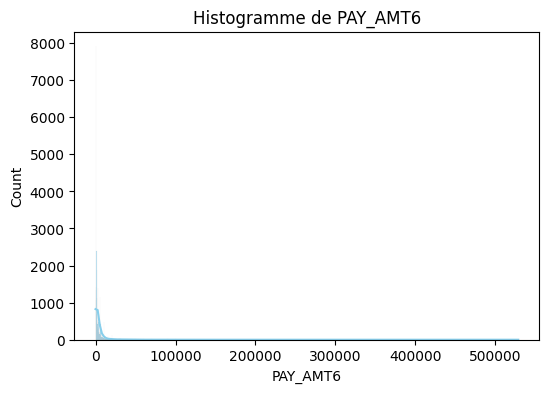

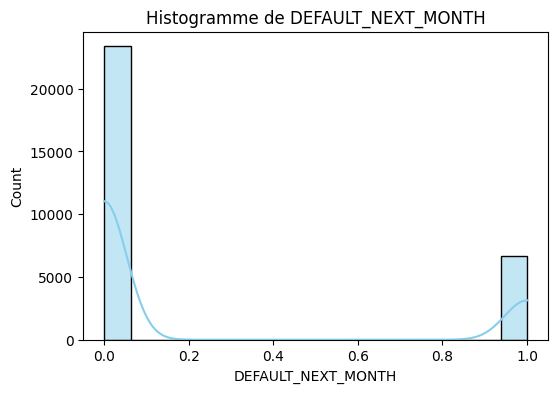

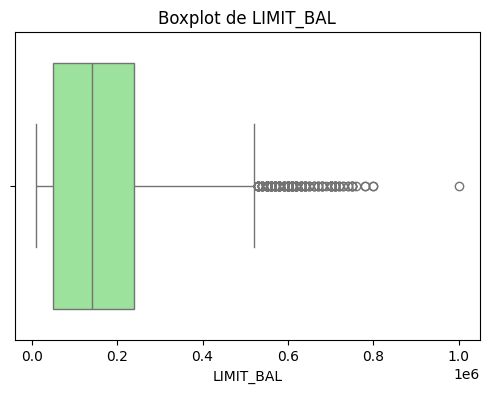

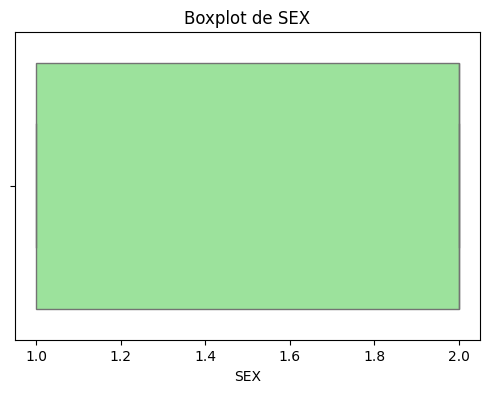

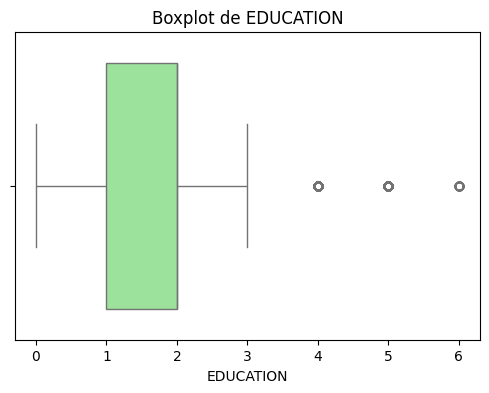

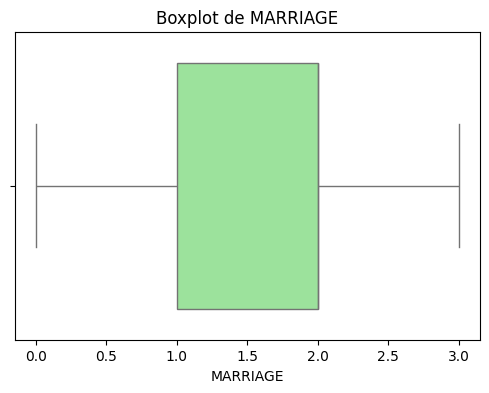

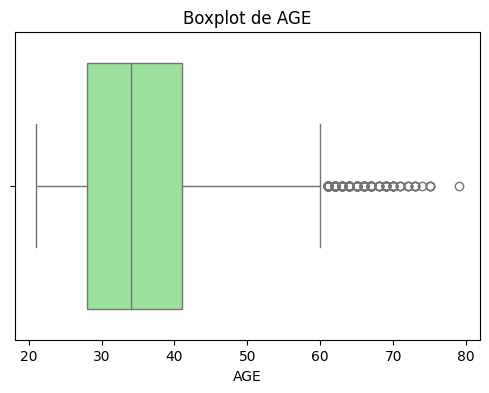

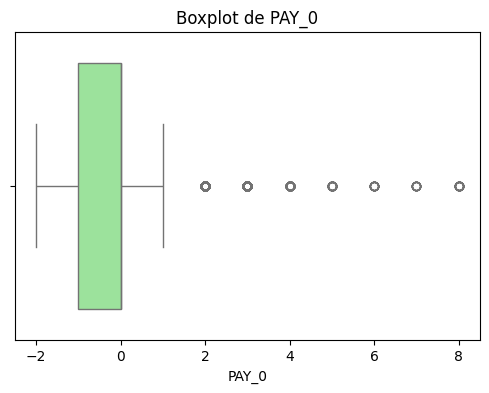

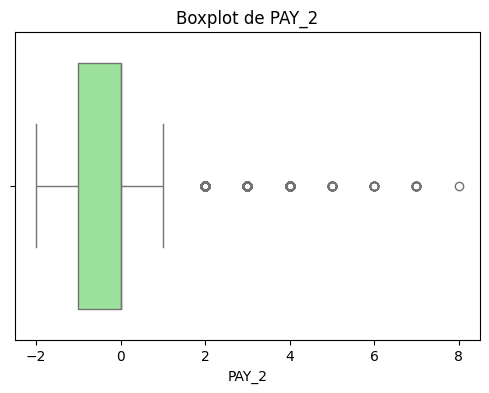

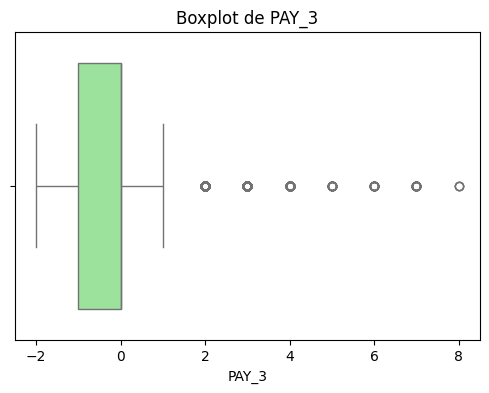

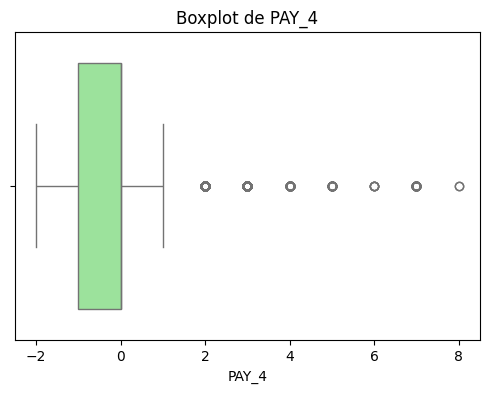

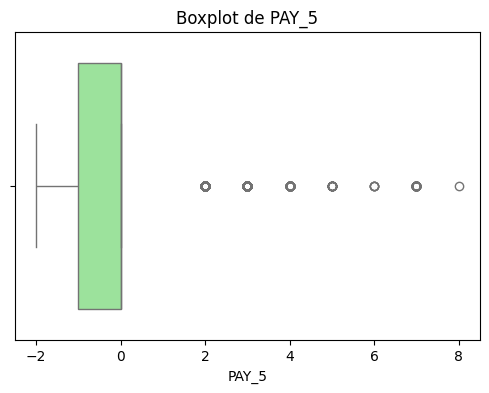

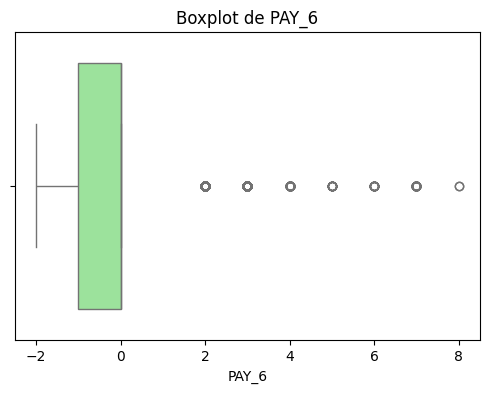

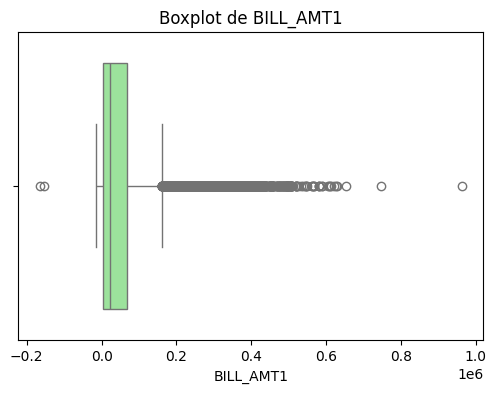

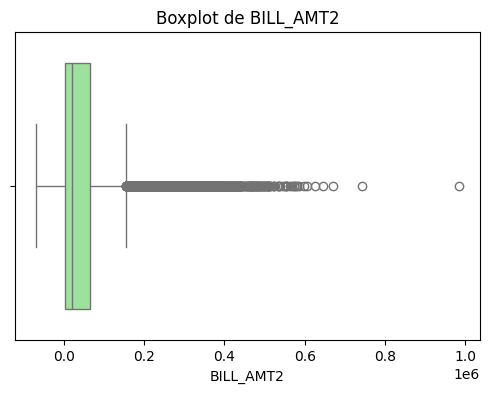

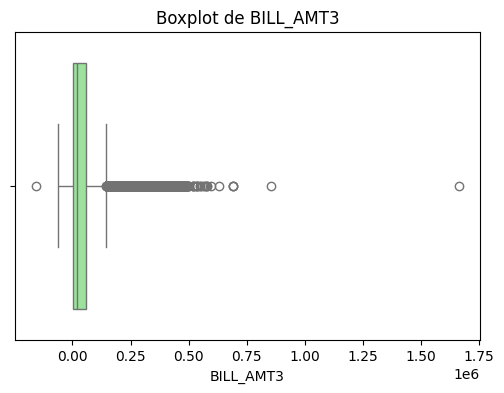

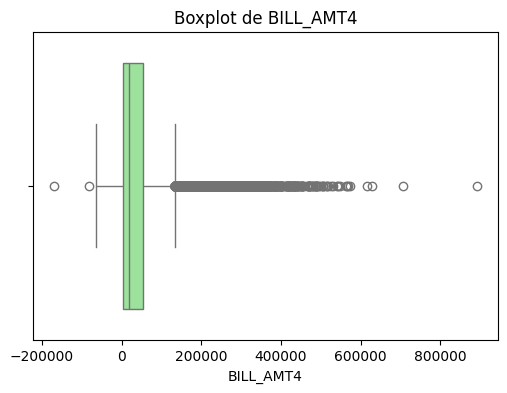

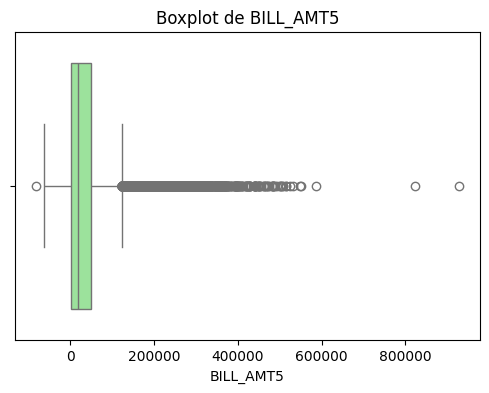

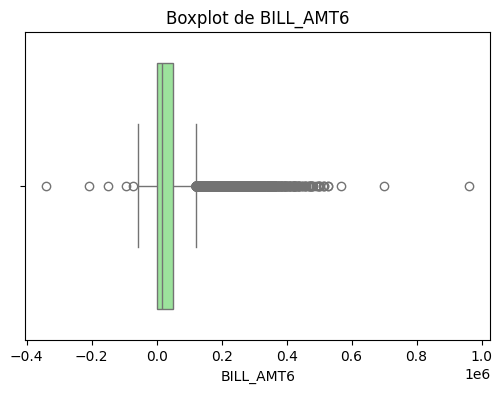

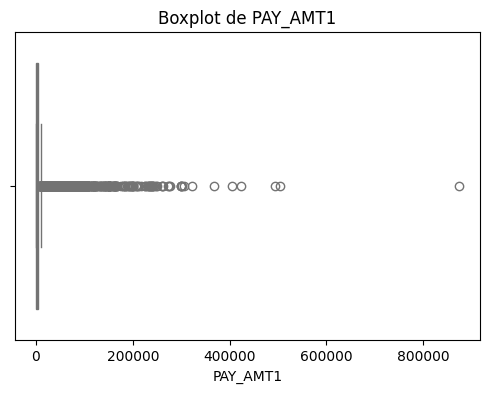

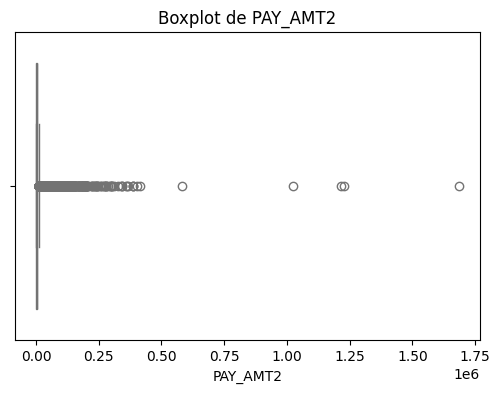

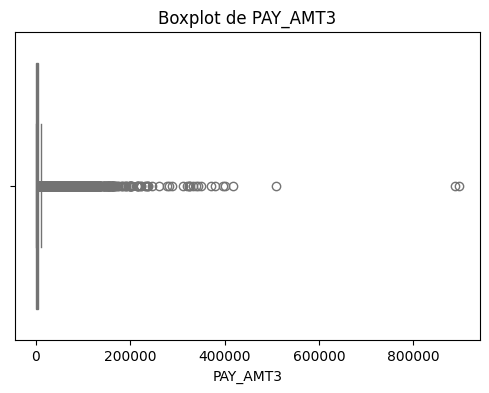

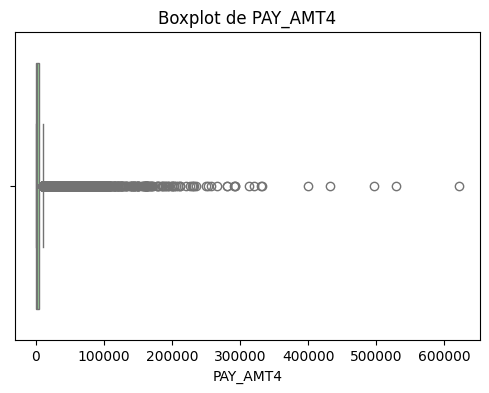

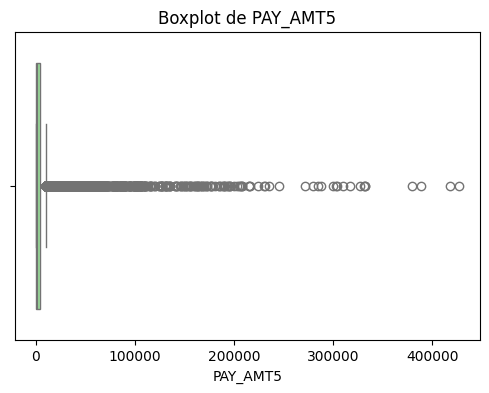

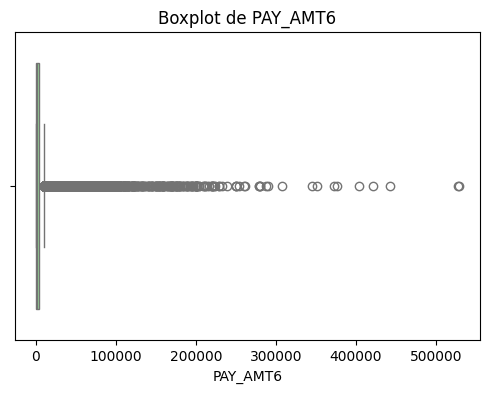

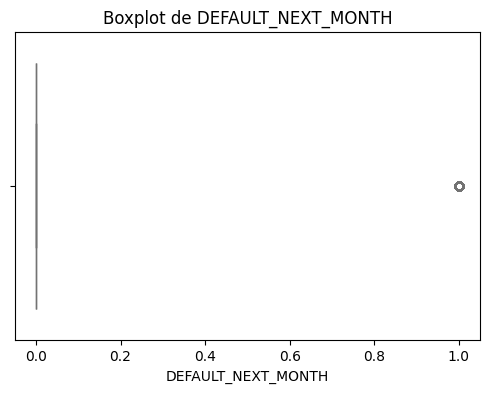

In [165]:

for col in data:
    plt.figure(figsize=(6,4))
    sns.histplot(data=data, x=col, kde=True, color='skyblue')
    plt.title(f"Histogramme de {col}")
    plt.show()


for col in data:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=data, x=col, color='lightgreen')
    plt.title(f"Boxplot de {col}")
    plt.show()


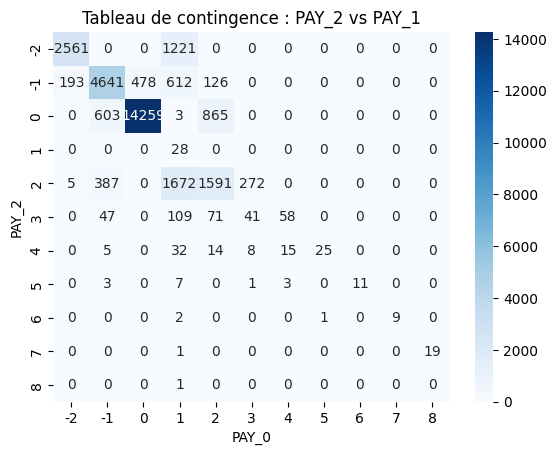

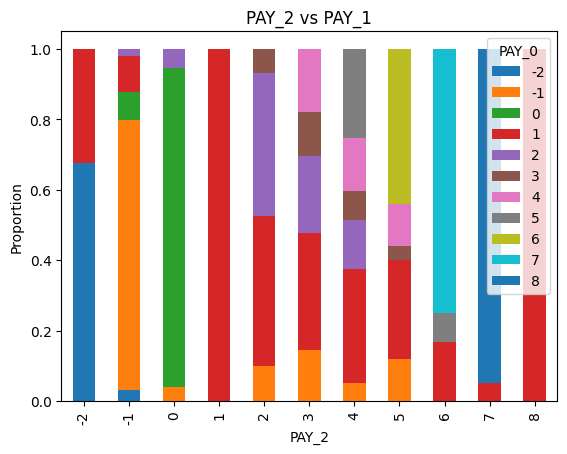

Statistique Khi-2 : 131599.7552761266
p-value : 0.0
Degrés de liberté : 100
Tableau des fréquences attendues :
 [[3.47817933e+02 7.16815067e+02 1.85784447e+03 4.64933867e+02
  3.36219800e+02 4.05934667e+01 9.58106667e+00 3.27773333e+00
  1.38673333e+00 1.13460000e+00 2.39526667e+00]
 [5.56398333e+02 1.14667667e+03 2.97196167e+03 7.43746667e+02
  5.37845000e+02 6.49366667e+01 1.53266667e+01 5.24333333e+00
  2.21833333e+00 1.81500000e+00 3.83166667e+00]
 [1.44663567e+03 2.98135933e+03 7.72710033e+03 1.93374133e+03
  1.39839700e+03 1.68835333e+02 3.98493333e+01 1.36326667e+01
  5.76766667e+00 4.71900000e+00 9.96233333e+00]
 [2.57506667e+00 5.30693333e+00 1.37545333e+01 3.44213333e+00
  2.48920000e+00 3.00533333e-01 7.09333333e-02 2.42666667e-02
  1.02666667e-02 8.40000000e-03 1.77333333e-02]
 [3.61153100e+02 7.44297400e+02 1.92907330e+03 4.82759200e+02
  3.49110300e+02 4.21498000e+01 9.94840000e+00 3.40340000e+00
  1.43990000e+00 1.17810000e+00 2.48710000e+00]
 [2.99811333e+01 6.17878667e

In [149]:
# Tableau croisé entre etat du paiment PAY_1 et etat du paiment PAY_2
contingence_table = pd.crosstab(data['PAY_2'],data['PAY_0'],)
sns.heatmap(contingence_table, annot=True, fmt='d', cmap='Blues')
plt.title("Tableau de contingence : PAY_2 vs PAY_1")
plt.show()
contingence_pct = contingence_table.div(contingence_table.sum(axis=1), axis=0)
contingence_pct.plot(kind='bar', stacked=True)
plt.title("PAY_2 vs PAY_1")
plt.xlabel("PAY_2")
plt.ylabel("Proportion")
plt.show()
# On constate qu'on a plus d'homme qui ont payé puis de femme qui ont payé
# puis d'homme qui n'ont pas payé puis de femme qui n'ont payé
chi2, p, dof, expected = chi2_contingency(contingence_table)

print(f"Statistique Khi-2 : {chi2}")
print(f"p-value : {p}") # la pi value est inférieure à 0.05 donc il y'a une dépendance du défaut de paiment au l'état du paiment du 4ème mois.
print(f"Degrés de liberté : {dof}")
print("Tableau des fréquences attendues :\n", expected)

### 1.3 Tests de Normalité
- **Kolmogorov-Smirnov** ou **Shapiro-Wilk** : Vérifient si la distribution suit (ou non) une loi normale.  
- **Utilité** : Décider si l’on peut utiliser des tests *paramétriques* (ANOVA, test t, etc.) ou si l’on privilégie des tests *non-paramétriques* (Kruskal-Wallis, Mann-Whitney, etc.).

### Test de Shapiro-Wilk

In [150]:
stat_shapiro, p_shapiro = shapiro(df)
print("stat_shapiro :",stat_shapiro)
print("p_shapiro :",p_shapiro)


stat_shapiro : 0.40293096516322413
p_shapiro : 5.268001577237519e-212


c:\Users\ilyes\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 690000.
  res = hypotest_fun_out(*samples, **kwds)


### Test de Kolmogorov-Smirnov

In [151]:
stat_ks, p_ks = kstest(df, 'norm')
print("stat_ks :",stat_ks)
print("p_ks :",p_ks)

stat_ks : [1.         0.84134475 0.84087808 0.83954475 1.         0.27273333
 0.35206667 0.35956667 0.383      0.40106667 0.39736667 0.9133
 0.8941     0.882335   0.87093305 0.86116833 0.84296638 0.823735
 0.818335   0.79950166 0.78446833 0.77496833 0.759435  ]
p_ks : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### Si la p-value > 0.05, on ne rejette pas l’hypothèse de normalité (en simplifiant).
#### Si la p-value < 0.05, on conclut que la distribution s’éloigne d’une loi normale.

## 2. Analyse Bivariée
### 2.1 Corrélation entre Variables Numériques
Pearson : Mesure la corrélation linéaire (utile si les deux variables sont normalement distribuées).
Spearman : Corrélation par rang (utile si les distributions ne sont pas normales ou s’il y a des outliers).

In [155]:
from scipy.stats import pearsonr, spearmanr, f_oneway

In [159]:
pearson_corr, pearson_p = pearsonr(data['LIMIT_BAL'], data['BILL_AMT1'])
print(f"Corrélation Pearson = {pearson_corr:.3f}, p-value = {pearson_p:.3e}")

spearman_corr, spearman_p = spearmanr(data['LIMIT_BAL'], data['BILL_AMT1'])
print(f"Corrélation Spearman = {spearman_corr:.3f}, p-value = {spearman_p:.3e}")

Corrélation Pearson = 0.285, p-value = 0.000e+00
Corrélation Spearman = 0.054, p-value = 4.251e-21


### 2.2 Comparaison des Groupes (ANOVA)
ANOVA (Analysis of Variance) : Permet de comparer la moyenne d’une variable numérique (dépendante) entre plusieurs groupes (facteur catégoriel).
Hypothèses : Normalité des résidus, homoscédasticité.

In [166]:
df=data.copy()
group1 = df[df['EDUCATION'] == 1]['AGE']
group2 = df[df['EDUCATION'] == 2]['AGE']
group3 = df[df['EDUCATION'] == 3]['AGE']

f_stat, p_value = f_oneway(group1, group2, group3)
print(f"ANOVA F-stat = {f_stat:.3f}, p-value = {p_value:.3e}")

ANOVA F-stat = 864.753, p-value = 0.000e+00


### 2.3 Visualisation des Relations
Scatter plots : Pour observer la tendance entre deux variables numériques.
Bar plots : Pour comparer les moyennes de groupes.

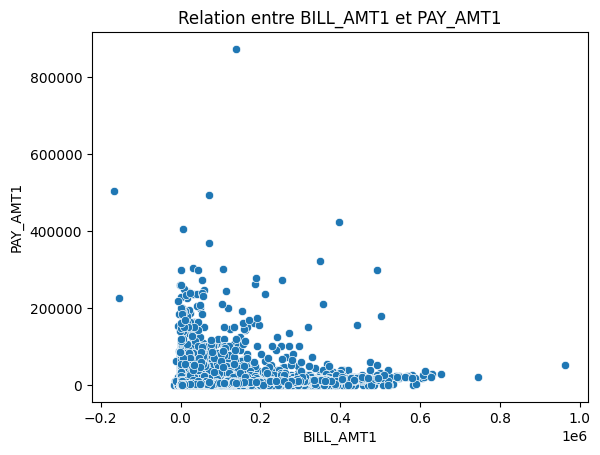

In [167]:

sns.scatterplot(x='BILL_AMT1', y='PAY_AMT1', data=df)
plt.title('Relation entre BILL_AMT1 et PAY_AMT1')
plt.show()

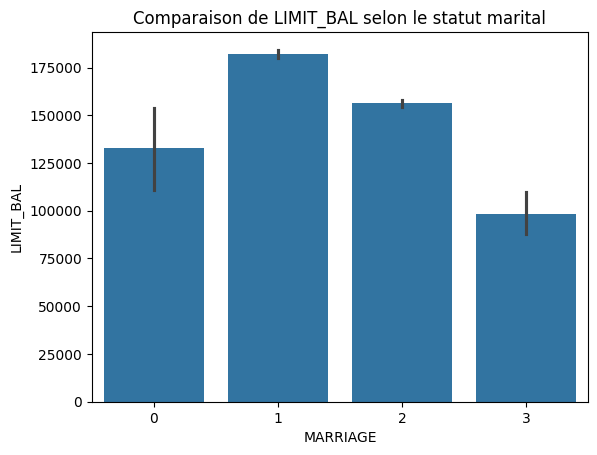

In [168]:

sns.barplot(x='MARRIAGE', y='LIMIT_BAL', data=df)
plt.title('Comparaison de LIMIT_BAL selon le statut marital')
plt.show()

## 3. Analyse Multivariée
### 3.1 PCA (Analyse en Composantes Principales)
Objectif : Réduire la dimensionnalité tout en conservant le maximum de variance possible.
Visualisation : Permet une représentation 2D ou 3D de l’espace des variables.

In [169]:
from sklearn.decomposition import PCA
from statsmodels.multivariate.manova import MANOVA
import statsmodels.api as sm

In [170]:

features_for_pca = ['LIMIT_BAL', 'PAY_AMT1', 'PAY_AMT2']
X_pca = df[features_for_pca].dropna() 
pca = PCA(n_components=2) 
pca_result = pca.fit_transform(X_pca)

print("Variance expliquée par composante :", pca.explained_variance_ratio_)
print("Composantes principales :\n", pca.components_)


Variance expliquée par composante : [0.95595086 0.03092928]
Composantes principales :
 [[ 0.99913695  0.02548682  0.0327991 ]
 [-0.0392331   0.31970007  0.9467062 ]]


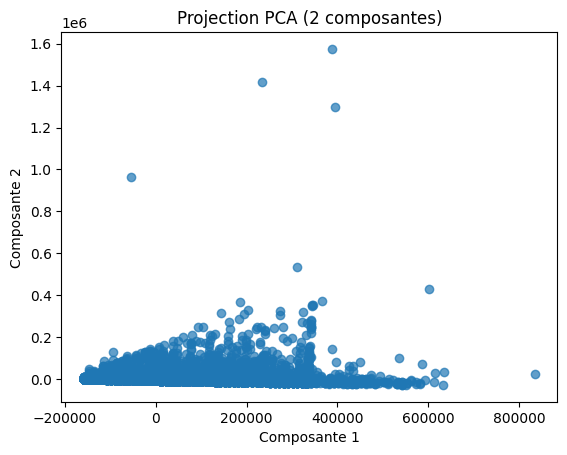

In [171]:

plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title("Projection PCA (2 composantes)")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.show()

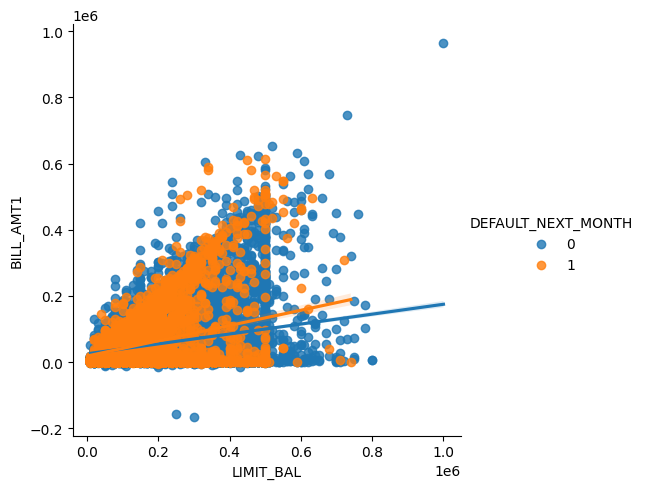

In [176]:
sns.lmplot(x="LIMIT_BAL", y="BILL_AMT1",hue='DEFAULT_NEXT_MONTH',data=df) # Il existe des données pour lequel le montant de facture est supérieur au montant de crédit ??

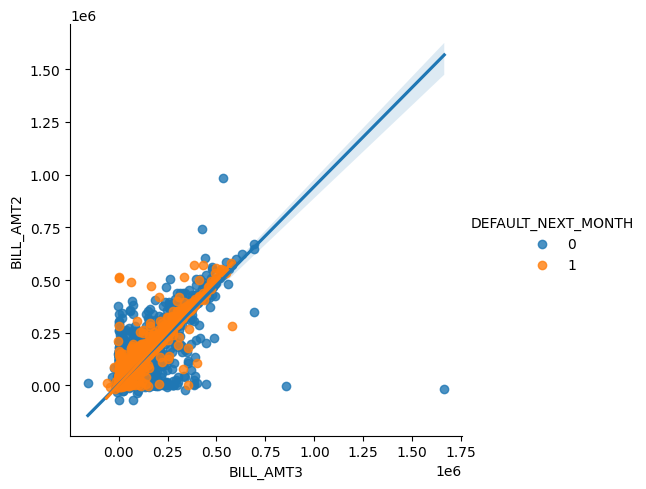

In [177]:
sns.lmplot(x="BILL_AMT3", y="BILL_AMT2",hue='DEFAULT_NEXT_MONTH',data=data)

### 3.2 MANOVA (Analyse de la Variance Multivariée)
Objectif : Examiner l’effet simultané de plusieurs facteurs (variables indépendantes) sur plusieurs variables dépendantes.
Exemple : Voir comment SEX et MARRIAGE influencent conjointement plusieurs variables financières (ex. LIMIT_BAL, BILL_AMT1)

In [178]:

manova_data = df.dropna(subset=['SEX','MARRIAGE','LIMIT_BAL','BILL_AMT1'])
ma_model = MANOVA.from_formula('LIMIT_BAL + BILL_AMT1 ~ C(SEX) + C(MARRIAGE)', data=manova_data)
print(ma_model.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
        Intercept        Value  Num DF   Den DF   F Value Pr > F
----------------------------------------------------------------
           Wilks' lambda 0.9982 2.0000 29994.0000 26.8638 0.0000
          Pillai's trace 0.0018 2.0000 29994.0000 26.8638 0.0000
  Hotelling-Lawley trace 0.0018 2.0000 29994.0000 26.8638 0.0000
     Roy's greatest root 0.0018 2.0000 29994.0000 26.8638 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
          C(SEX)         Value  Num DF   Den DF   F Value Pr > F
----------------------------------------------------------------
           Wilks' lambda 0.9977 2.0000 29994.0000 33.9484 0.0000
          Pillai's trace 0.0023 2.0000 29994.

### 3.3 MANCOVA
Objectif : Même principe que la MANOVA, mais avec des covariables quantitatives que l’on souhaite contrôler (par ex. AGE).
Utilité : Tester l’effet “pur” des facteurs indépendants, en tenant compte de la variabilité due aux covariables.

In [179]:

ma_model_cov = MANOVA.from_formula('LIMIT_BAL + BILL_AMT1 ~ C(SEX) + C(MARRIAGE) + AGE', 
                                   data=manova_data)
print(ma_model_cov.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
        Intercept        Value  Num DF   Den DF   F Value Pr > F
----------------------------------------------------------------
           Wilks' lambda 0.9997 2.0000 29993.0000  4.3230 0.0133
          Pillai's trace 0.0003 2.0000 29993.0000  4.3230 0.0133
  Hotelling-Lawley trace 0.0003 2.0000 29993.0000  4.3230 0.0133
     Roy's greatest root 0.0003 2.0000 29993.0000  4.3230 0.0133
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
          C(SEX)         Value  Num DF   Den DF   F Value Pr > F
----------------------------------------------------------------
           Wilks' lambda 0.9971 2.0000 29993.0000 44.1646 0.0000
          Pillai's trace 0.0029 2.0000 29993.

# **Modélisation et Évaluation de Plusieurs Algorithmes (LR, KNN, SVM, NB, DT, RFC)**

Dans ce projet, nous allons déployer plusieurs **modèles de classification** sur deux versions du même jeu de données :

1. **Jeu de données original** (avec outliers)  
2. **Jeu de données filtré** (avec outliers supprimés)

Nous présenterons également **une régression linéaire** pour estimer directement un montant de crédit (si nécessaire).

L’objectif est :
- De comparer la **performance** (Accuracy, Recall, Precision, F1-score) de différents algorithmes :  
  - **LR** : Logistic Regression  
  - **KNN** : K-Nearest Neighbors  
  - **SVM** : Support Vector Machine  
  - **NB** : Naïve Bayes Classifier  
  - **DT** : Decision Tree  
  - **RFC** : Random Forest Classifier
- D’afficher les **matrices de confusion** et les **courbes ROC** pour chaque modèle.
- De **visualiser** les résultats finaux (accuracy) sous forme de tableau et de bar chart.

> **Note** : Dans l’exemple, nous considérons que vous avez déjà un DataFrame `df` contenant vos variables prédictives `X` et votre cible `y`. 

---

## 1. Préparation du Dataset

### 1.1 Chargement et Séparation en Features/Cible

In [251]:
df=data.copy()
X = df.drop('DEFAULT_NEXT_MONTH', axis=1) 
y = df['DEFAULT_NEXT_MONTH']



In [252]:

X_Noutlier = df_no_outliers.drop('DEFAULT_NEXT_MONTH', axis=1)  
y_Noutlier = df_no_outliers['DEFAULT_NEXT_MONTH']


# **Standardiser/Normaliser certaines colonnes et séparer les données**

Il est fréquent de vouloir **standardiser** ou **normaliser** certaines colonnes avant de passer à la modélisation. Voici un exemple de code illustrant :

1. **Identification** des colonnes à standardiser (ou normaliser).
2. Application du **StandardScaler** (ou **MinMaxScaler**).
3. Séparation des features (X) et de la cible (y).

## 2. Création d’un Pipeline d’Évaluation
Nous allons définir un pipeline qui :

Divise le dataset en train/test à 70/30.
Entraîne les 6 modèles (LR, KNN, SVM, NB, DT, RFC).
Calcule leurs metrics (Accuracy, Recall, Precision, F1-score).
Affiche la matrice de confusion et la courbe ROC pour chaque modèle.
### 2.1 Import des Librairies Nécessaires

In [253]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


### 2.2 Fonction Utilitaire pour l’Évaluation

In [254]:
import joblib

In [255]:
def evaluate_classifiers(X_data, y_data, title="With Outliers"):
    """
    - Divise X_data, y_data en train/test (70/30).
    - Entraîne 6 modèles de classification (LR, KNN, SVM, NB, DT, RFC).
    - Compare leurs performances et enregistre le meilleur modèle (basé sur F1_score).
    - Affiche metrics, matrice de confusion et courbe ROC pour chaque modèle.
    - Retourne un DataFrame avec les résultats agrégés.
    """
    
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y_data, test_size=0.30, random_state=42, stratify=y_data
    )
    
    
    if len(np.unique(y_train)) < 2:
        print(f"[{title}] ERREUR : Seulement 1 classe présente dans y_train.")
        print("Impossible de former un modèle de classification.\n")
        return pd.DataFrame()
    

    models = {
        "LR":  LogisticRegression(max_iter=500),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "SVM": SVC(probability=True),
        "NB":  GaussianNB(),
        "DT":  DecisionTreeClassifier(random_state=42),
        "RFC": RandomForestClassifier(n_estimators=100, random_state=42)
    }
    
    results = []
    
    
    best_model = None
    best_model_name = None
    best_f1 = -1.0  
    
   
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
   
        y_prob = model.predict_proba(X_test)[:, 1]
        
      
        acc  = accuracy_score(y_test, y_pred)
        rec  = recall_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        f1   = f1_score(y_test, y_pred)
        auc  = roc_auc_score(y_test, y_prob)
        
        results.append({
            "Model": model_name,
            "Accuracy": acc,
            "Recall": rec,
            "Precision": prec,
            "F1_score": f1,
            "AUC": auc
        })
        
     
        if f1 > best_f1:
            best_f1 = f1
            best_model = model
            best_model_name = model_name
        
       
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(4,3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Matrice de confusion - {model_name} ({title})")
        plt.xlabel("Prédit")
        plt.ylabel("Réel")
        plt.show()
        
        #
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(4,3))
        plt.plot(fpr, tpr, label=f"{model_name} (AUC={auc:.2f})")
        plt.plot([0,1],[0,1], 'r--')
        plt.title(f"Courbe ROC - {model_name} ({title})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()
        
        
        print(f"=== {model_name} - {title} ===")
        print(classification_report(y_test, y_pred))
    
    
    print("\n=== Meilleur Modèle (basé sur F1_score) ===")
    print(f"Modèle: {best_model_name}, F1_score: {best_f1:.4f}")
  
    file_name = f"best_model_{title.replace(' ', '_')}.pkl"
    joblib.dump(best_model, file_name)
    print(f"Le meilleur modèle a été enregistré dans le fichier : {file_name}")
    
    
    results_df = pd.DataFrame(results)
    return results_df

### 2.3 Exécution sur les Deux Jeux de Données (Avec et Sans Outliers)

c:\Users\ilyes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


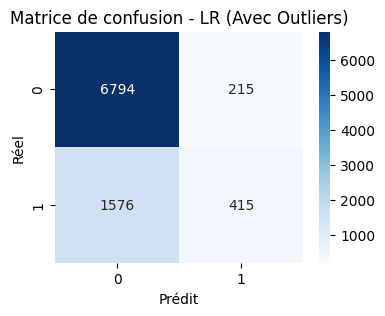

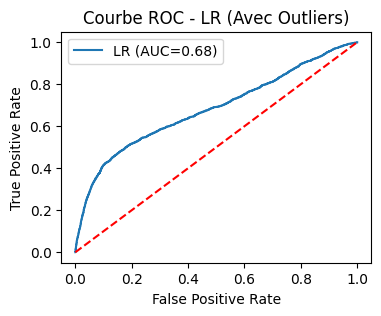

=== LR - Avec Outliers ===
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7009
           1       0.66      0.21      0.32      1991

    accuracy                           0.80      9000
   macro avg       0.74      0.59      0.60      9000
weighted avg       0.78      0.80      0.76      9000



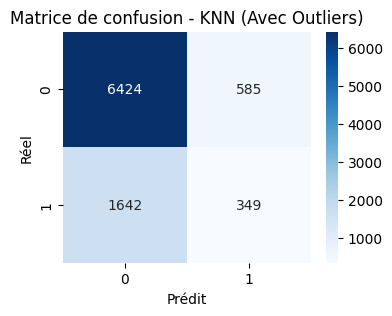

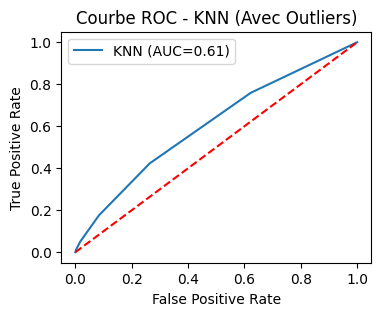

=== KNN - Avec Outliers ===
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      7009
           1       0.37      0.18      0.24      1991

    accuracy                           0.75      9000
   macro avg       0.59      0.55      0.55      9000
weighted avg       0.70      0.75      0.72      9000



c:\Users\ilyes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


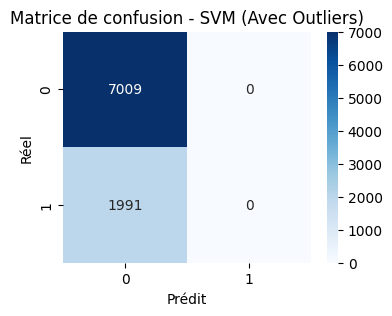

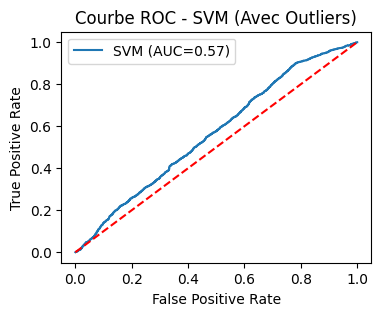

=== SVM - Avec Outliers ===
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.00      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000



c:\Users\ilyes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ilyes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ilyes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


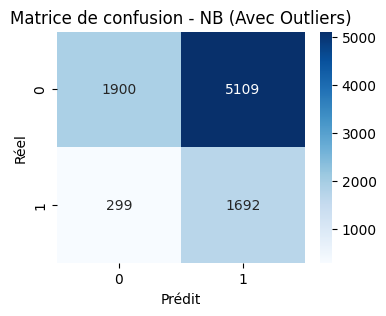

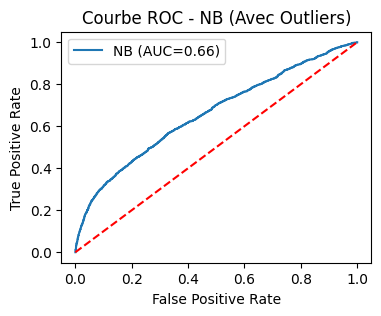

=== NB - Avec Outliers ===
              precision    recall  f1-score   support

           0       0.86      0.27      0.41      7009
           1       0.25      0.85      0.38      1991

    accuracy                           0.40      9000
   macro avg       0.56      0.56      0.40      9000
weighted avg       0.73      0.40      0.41      9000



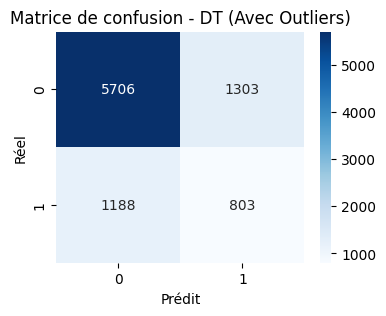

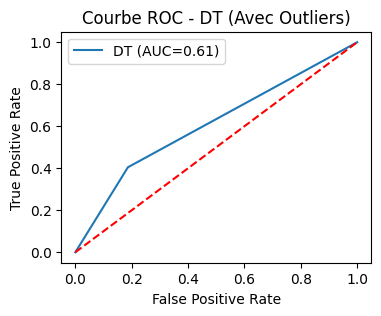

=== DT - Avec Outliers ===
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7009
           1       0.38      0.40      0.39      1991

    accuracy                           0.72      9000
   macro avg       0.60      0.61      0.61      9000
weighted avg       0.73      0.72      0.73      9000



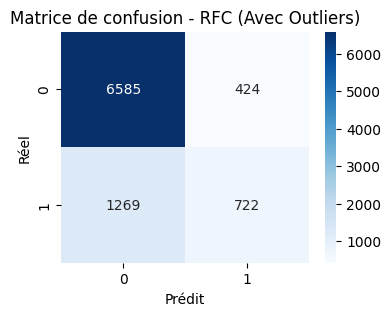

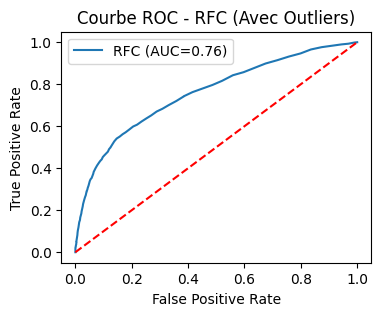

=== RFC - Avec Outliers ===
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.63      0.36      0.46      1991

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000


=== Meilleur Modèle (basé sur F1_score) ===
Modèle: RFC, F1_score: 0.4603
Le meilleur modèle a été enregistré dans le fichier : best_model_Avec_Outliers.pkl

=== Résultats (Avec Outliers) ===


,Model,Accuracy,Recall,Precision,F1_score,AUC
0,LR,0.801000,0.208438,0.658730,0.316673,0.681620
1,KNN,0.752556,0.175289,0.373662,0.238632,0.606010
2,SVM,0.778778,0.000000,0.000000,0.000000,0.565514
3,NB,0.399111,0.849824,0.248787,0.384895,0.659403
4,DT,0.723222,0.403315,0.381292,0.391994,0.609029
5,RFC,0.811889,0.362632,0.630017,0.460312,0.756979


In [256]:

results_outlier = evaluate_classifiers(X, y, title="Avec Outliers")
print("\n=== Résultats (Avec Outliers) ===")
display(results_outlier)




c:\Users\ilyes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


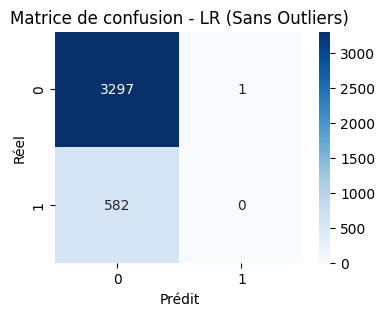

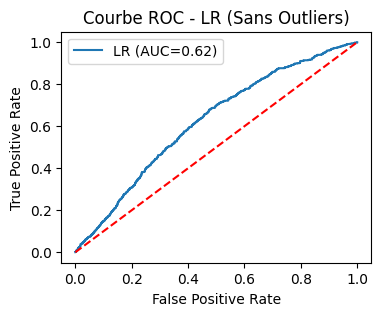

=== LR - Sans Outliers ===
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3298
           1       0.00      0.00      0.00       582

    accuracy                           0.85      3880
   macro avg       0.42      0.50      0.46      3880
weighted avg       0.72      0.85      0.78      3880



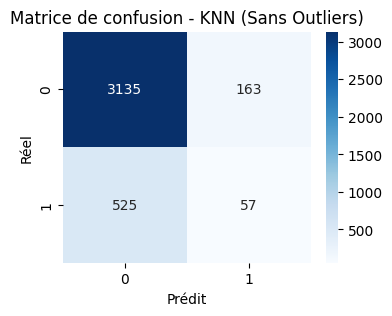

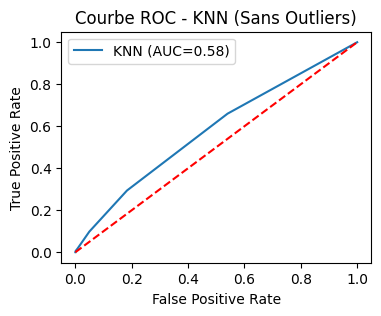

=== KNN - Sans Outliers ===
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      3298
           1       0.26      0.10      0.14       582

    accuracy                           0.82      3880
   macro avg       0.56      0.52      0.52      3880
weighted avg       0.77      0.82      0.79      3880



c:\Users\ilyes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


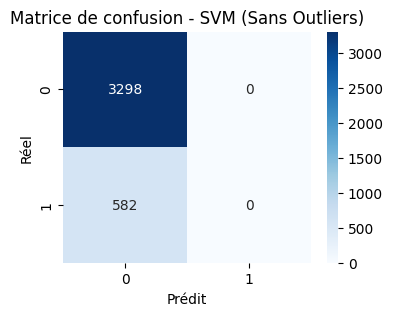

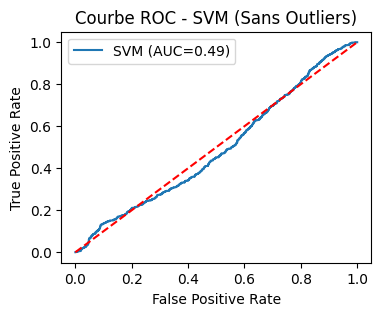

=== SVM - Sans Outliers ===
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3298
           1       0.00      0.00      0.00       582

    accuracy                           0.85      3880
   macro avg       0.42      0.50      0.46      3880
weighted avg       0.72      0.85      0.78      3880



c:\Users\ilyes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ilyes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ilyes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


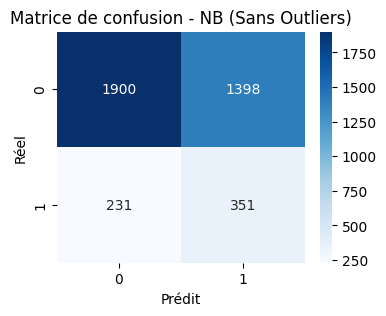

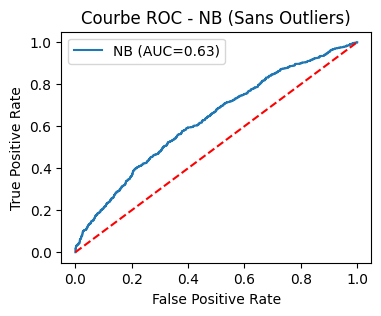

=== NB - Sans Outliers ===
              precision    recall  f1-score   support

           0       0.89      0.58      0.70      3298
           1       0.20      0.60      0.30       582

    accuracy                           0.58      3880
   macro avg       0.55      0.59      0.50      3880
weighted avg       0.79      0.58      0.64      3880



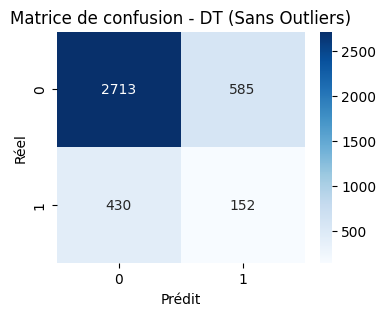

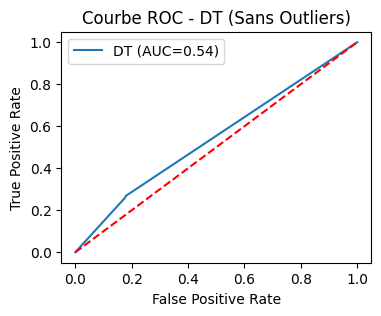

=== DT - Sans Outliers ===
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      3298
           1       0.21      0.26      0.23       582

    accuracy                           0.74      3880
   macro avg       0.53      0.54      0.54      3880
weighted avg       0.76      0.74      0.75      3880



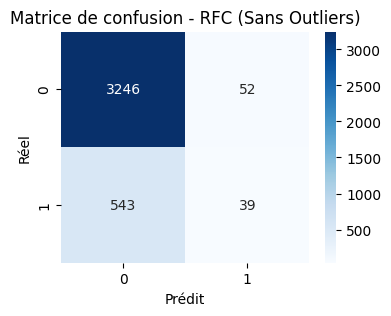

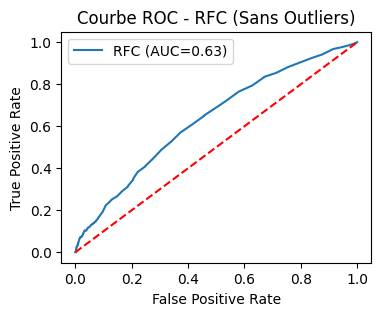

=== RFC - Sans Outliers ===
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      3298
           1       0.43      0.07      0.12       582

    accuracy                           0.85      3880
   macro avg       0.64      0.53      0.52      3880
weighted avg       0.79      0.85      0.80      3880


=== Meilleur Modèle (basé sur F1_score) ===
Modèle: NB, F1_score: 0.3012
Le meilleur modèle a été enregistré dans le fichier : best_model_Sans_Outliers.pkl

=== Résultats (Sans Outliers) ===


,Model,Accuracy,Recall,Precision,F1_score,AUC
0,LR,0.849742,0.000000,0.000000,0.000000,0.620960
1,KNN,0.822680,0.097938,0.259091,0.142145,0.580575
2,SVM,0.850000,0.000000,0.000000,0.000000,0.490951
3,NB,0.580155,0.603093,0.200686,0.301158,0.630739
4,DT,0.738402,0.261168,0.206242,0.230478,0.544163
5,RFC,0.846649,0.067010,0.428571,0.115899,0.632082


In [257]:
results_no_outlier = evaluate_classifiers(X_Noutlier, y_Noutlier, title="Sans Outliers")
print("\n=== Résultats (Sans Outliers) ===")
display(results_no_outlier)


### 2.4 Visualisation Finale : Bar Chart des Accuracies

C:\Users\ilyes\AppData\Local\Temp\ipykernel_19112\3174521344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


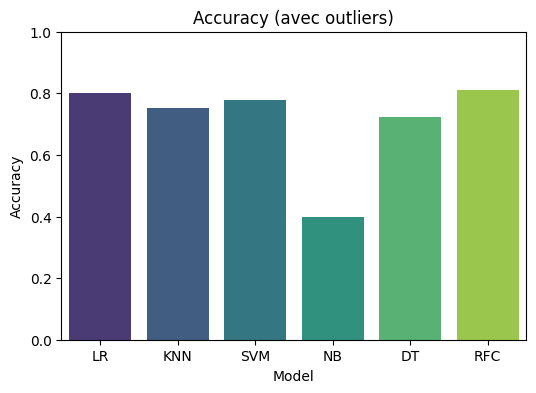

C:\Users\ilyes\AppData\Local\Temp\ipykernel_19112\3174521344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


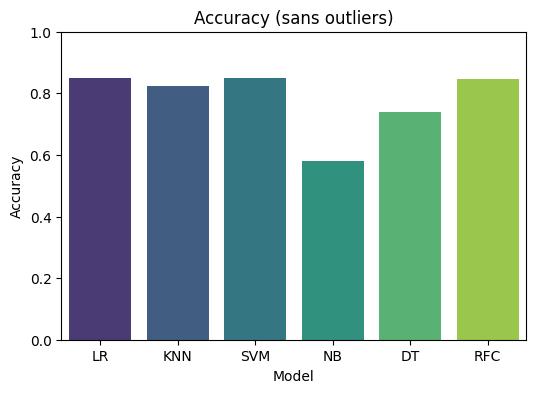

In [258]:
def plot_accuracy_comparison(results_df, title="Comparaison d'Accuracy"):
    plt.figure(figsize=(6,4))
    sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
    plt.ylim(0, 1)
    plt.title(title)
    plt.ylabel("Accuracy")
    plt.show()

plot_accuracy_comparison(results_outlier, "Accuracy (avec outliers)")
plot_accuracy_comparison(results_no_outlier, "Accuracy (sans outliers)")


# Sélection de Features 

# **Sélection de Variables selon la Table 4 (T. Le et al.)**

Selon l'extrait de la Table 4, certaines variables sont marquées par un "x" et ne sont **pas** retenues dans l'analyse.  
Pour rappel, le dataset original contient les variables `X1` à `X23`, dont :

| ID  | Feature  | Feature selection |
|-----|----------|--------------------|
| 1   | X1       | Limit_bal         |
| 2   | X2       | Sex               |
| 3   | X3       | Education         |
| 4   | X4       | Marriage          |
| 5   | X5       | Age               |
| 6   | X6       | Pay_0             |
| 7   | X7       | Pay_2             |
| 8   | X8       | Pay_3             |
| 9   | X9       | x (exclu)         |
| 10  | X10      | x (exclu)         |
| 11  | X11      | x (exclu)         |
| 12  | X12      | Bill_amt1         |
| 13  | X13      | x (exclu)         |
| 14  | X14      | x (exclu)         |
| 15  | X15      | Bill_amt4         |
| 16  | X16      | Bill_amt5         |
| 17  | X17      | x (exclu)         |
| 18  | X18      | Pay_amt1          |
| 19  | X19      | Pay_amt2          |
| 20  | X20      | Pay_amt3          |
| 21  | X21      | Pay_amt4          |
| 22  | X22      | Pay_amt5          |
| 23  | X23      | Pay_amt6          |

Ici, les entrées signalées par **x** sont à **exclure** (X9, X10, X11, X13, X14, X17).  
On conserve donc X1, X2, X3, X4, X5, X6, X7, X8, X12, X15, X16, X18, X19, X20, X21, X22, X23.

---


In [259]:
selected_features = [
    "LIMIT_BAL",
    "SEX",
    "EDUCATION",
    "MARRIAGE",
    "AGE",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "BILL_AMT1",
    "BILL_AMT4",
    "BILL_AMT5",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6"
]


data_selected = data[selected_features].copy()

print("Dimensions initiales :", data.shape)
print("Dimensions après sélection :", data_selected.shape)
data_selected.head()


Dimensions initiales : (30000, 24)
Dimensions après sélection : (30000, 17)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,BILL_AMT1,BILL_AMT4,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24.0,2,2,-1,3913.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26.0,-1,2,0,2682.0,3272.0,3455.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34.0,0,0,0,29239.0,14331.0,14948.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37.0,0,0,0,46990.0,28314.0,28959.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57.0,-1,0,-1,8617.0,20940.0,19146.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


## Select Features :

In [263]:
selected_features = [
    "LIMIT_BAL",
    "SEX",
    "EDUCATION",
    "MARRIAGE",
    "AGE",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "BILL_AMT1",
    "BILL_AMT4",
    "BILL_AMT5",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6"
]

# Création d'un nouveau DataFrame ne contenant que ces features
data_selected = df_no_outliers[selected_features].copy()

# Vérification
print("Dimensions initiales :", df_no_outliers.shape)
print("Dimensions après sélection :", data_selected.shape)
data_selected.head()


Dimensions initiales : (12933, 24)
Dimensions après sélection : (12933, 17)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,BILL_AMT1,BILL_AMT4,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
2,90000.0,2,2,2,34.0,0,0,0,29239.0,14331.0,14948.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37.0,0,0,0,46990.0,28314.0,28959.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000.0,1,1,2,37.0,0,0,0,64400.0,19394.0,19619.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0
7,100000.0,2,2,2,23.0,0,-1,-1,11876.0,221.0,-159.0,380.0,601.0,0.0,581.0,1687.0,1542.0
14,250000.0,1,1,2,29.0,0,0,0,70887.0,59696.0,56875.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0


c:\Users\ilyes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ilyes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


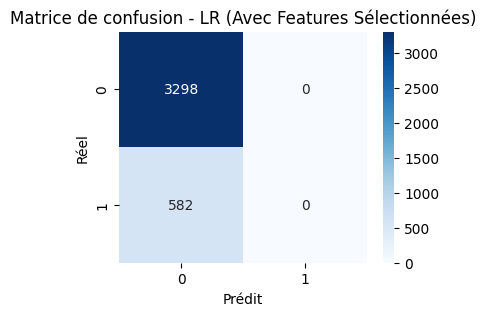

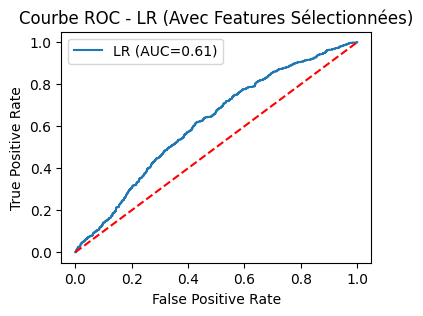

=== LR - Avec Features Sélectionnées ===
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3298
           1       0.00      0.00      0.00       582

    accuracy                           0.85      3880
   macro avg       0.42      0.50      0.46      3880
weighted avg       0.72      0.85      0.78      3880



c:\Users\ilyes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ilyes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ilyes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


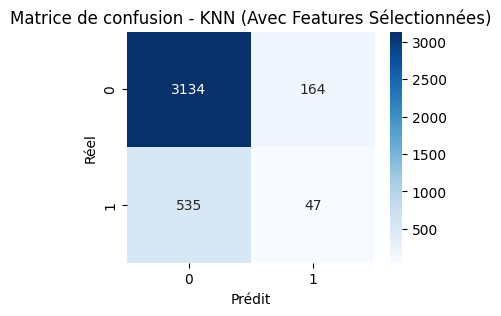

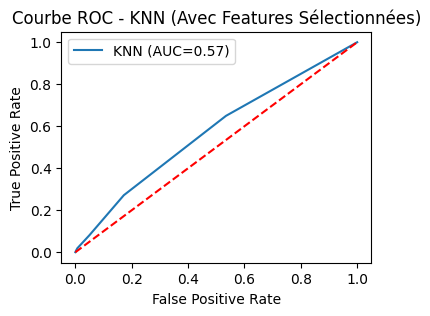

=== KNN - Avec Features Sélectionnées ===
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      3298
           1       0.22      0.08      0.12       582

    accuracy                           0.82      3880
   macro avg       0.54      0.52      0.51      3880
weighted avg       0.76      0.82      0.78      3880



c:\Users\ilyes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


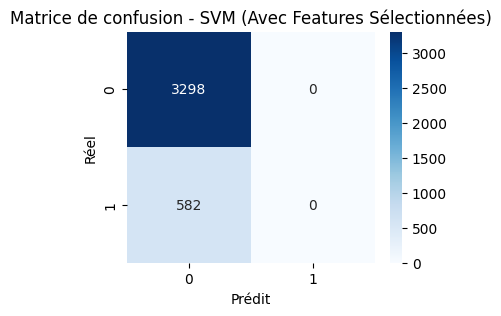

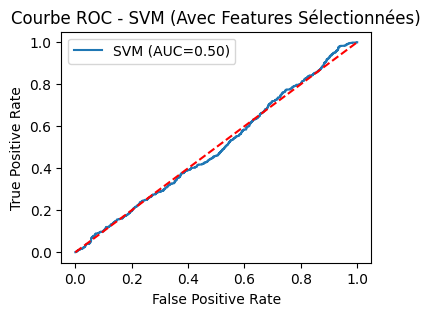

=== SVM - Avec Features Sélectionnées ===
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3298
           1       0.00      0.00      0.00       582

    accuracy                           0.85      3880
   macro avg       0.42      0.50      0.46      3880
weighted avg       0.72      0.85      0.78      3880



c:\Users\ilyes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ilyes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ilyes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


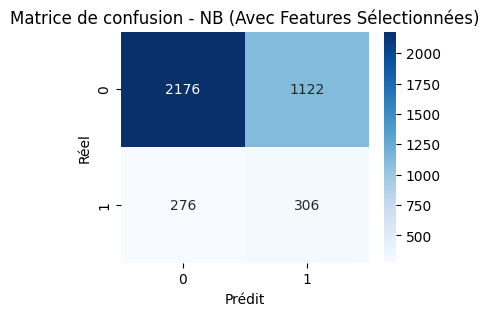

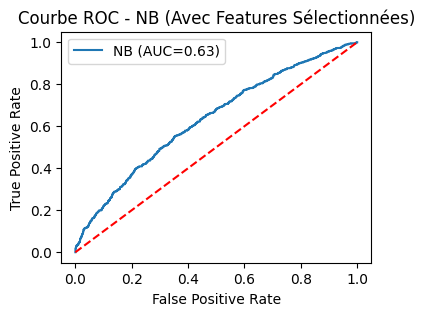

=== NB - Avec Features Sélectionnées ===
              precision    recall  f1-score   support

           0       0.89      0.66      0.76      3298
           1       0.21      0.53      0.30       582

    accuracy                           0.64      3880
   macro avg       0.55      0.59      0.53      3880
weighted avg       0.79      0.64      0.69      3880



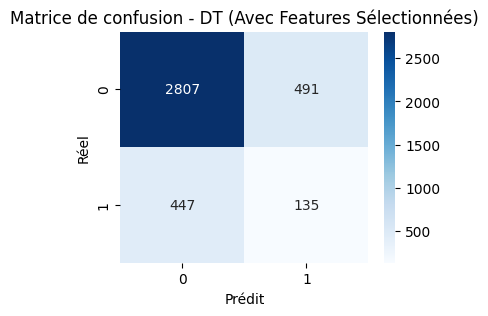

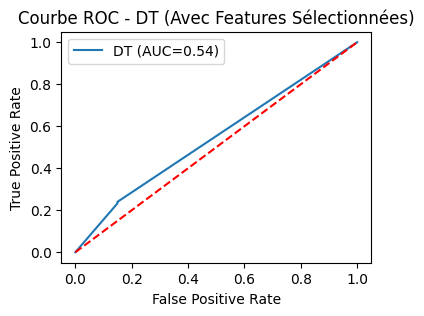

=== DT - Avec Features Sélectionnées ===
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      3298
           1       0.22      0.23      0.22       582

    accuracy                           0.76      3880
   macro avg       0.54      0.54      0.54      3880
weighted avg       0.77      0.76      0.76      3880



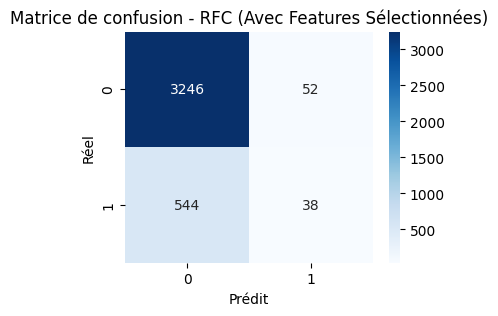

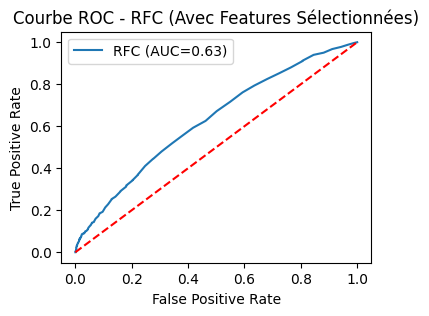

=== RFC - Avec Features Sélectionnées ===
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      3298
           1       0.42      0.07      0.11       582

    accuracy                           0.85      3880
   macro avg       0.64      0.52      0.51      3880
weighted avg       0.79      0.85      0.80      3880


=== Meilleur Modèle (basé sur F1_score) ===
Modèle: NB, F1_score: 0.3045
Le meilleur modèle a été enregistré dans le fichier : best_model_Avec_Features_Sélectionnées.pkl

=== Résultats (Avec Features Sélectionnées) ===


,Model,Accuracy,Recall,Precision,F1_score,AUC
0,LR,0.801000,0.208438,0.658730,0.316673,0.681620
1,KNN,0.752556,0.175289,0.373662,0.238632,0.606010
2,SVM,0.778778,0.000000,0.000000,0.000000,0.565514
3,NB,0.399111,0.849824,0.248787,0.384895,0.659403
4,DT,0.723222,0.403315,0.381292,0.391994,0.609029
5,RFC,0.811889,0.362632,0.630017,0.460312,0.756979


In [265]:

results_select = evaluate_classifiers(data_selected, y_Noutlier, title="Avec Features Sélectionnées")
print("\n=== Résultats (Avec Features Sélectionnées) ===")
display(results_outlier)




C:\Users\ilyes\AppData\Local\Temp\ipykernel_19112\3174521344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


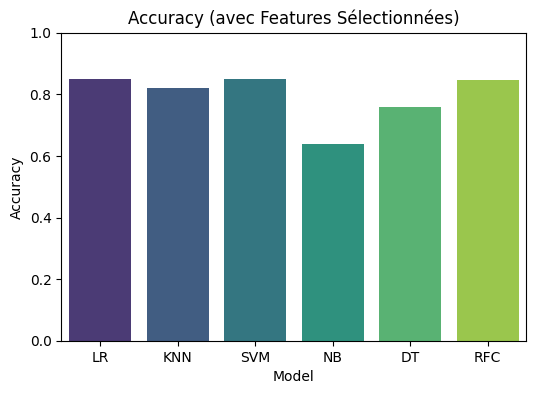

In [266]:
plot_accuracy_comparison(results_select, "Accuracy (avec Features Sélectionnées)")

# MLP (1 couche cachée), Variation du Nombre de Neurones, Enregistrement du Meilleur Modèle et Graphique de la Perte

Dans cet exemple, nous illustrons :

1. La construction d’un **réseau de neurones** (Multilayer Perceptron, MLP) avec **une seule couche cachée**.
2. La **variation** du nombre de neurones (de 5 à 45) pour trouver la meilleure configuration.
3. L’utilisation de **Keras** avec un mécanisme d’**Early Stopping** (arrêt anticipé) et de **ModelCheckpoint** (pour enregistrer le meilleur modèle).
4. L’affichage de la **courbe de perte** (loss) en entraînement/validation (similaire à la figure partagée).

---

In [268]:
!pip install tensorflow 

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/48.6 kB ? eta -:--:--
     ---------------------------------------- 48.6/48.6 kB 2.4 MB/s eta 0:00:00
  U


=== Entraînement avec 5 neurones ===


c:\Users\ilyes\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


-> Val Accuracy : 0.8402, Val Loss: 0.4200

=== Entraînement avec 15 neurones ===


-> Val Accuracy : 0.8402, Val Loss: 0.4226

=== Entraînement avec 25 neurones ===


-> Val Accuracy : 0.8402, Val Loss: 0.4237

=== Entraînement avec 35 neurones ===


-> Val Accuracy : 0.8405, Val Loss: 0.4204

=== Entraînement avec 45 neurones ===


-> Val Accuracy : 0.8402, Val Loss: 0.4216


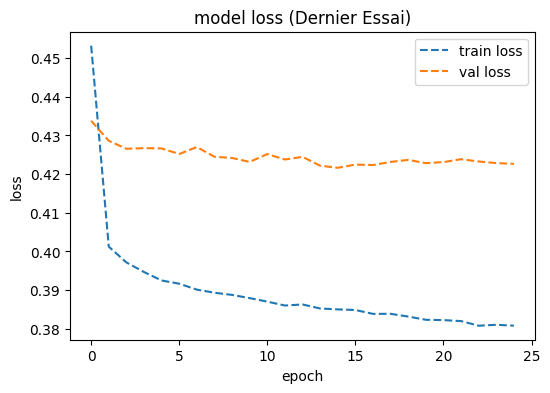


Meilleur modèle : 35 neurones, Accuracy val = 0.8405
Vous pouvez recharger ce modèle depuis le fichier best_model_{n}_neurons.h5 correspondant.


In [269]:



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint




X = data_selected
y = y_Noutlier


X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42
)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)


def build_mlp(n_neurons=10):
    """
    Construit un MLP avec 1 couche cachée comprenant 'n_neurons' neurones.
    """
    model = Sequential()
 
    model.add(Dense(n_neurons, activation='relu', input_shape=(X_train.shape[1],)))
  
    model.add(Dense(1, activation='sigmoid'))
    

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


neurons_list = [5, 15, 25, 35, 45]
best_accuracy = -1.0
best_model = None
best_neurons = None

for n in neurons_list:
    print(f"\n=== Entraînement avec {n} neurones ===")
    model = build_mlp(n_neurons=n)
    

    es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    checkpoint = ModelCheckpoint(
        f"best_model_{n}_neurons.h5",
        monitor='val_loss',
        save_best_only=True,
        verbose=0
    )
    

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=150,  
        batch_size=32,
        callbacks=[es, checkpoint],
        verbose=0 
    )
    
    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    print(f"-> Val Accuracy : {val_acc:.4f}, Val Loss: {val_loss:.4f}")

    if val_acc > best_accuracy:
        best_accuracy = val_acc
        best_model = model
        best_neurons = n
   

plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], '--', label='train loss')
plt.plot(history.history['val_loss'], '--', label='val loss')
plt.title("model loss (Dernier Essai)")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()


print(f"\nMeilleur modèle : {best_neurons} neurones, Accuracy val = {best_accuracy:.4f}")
print("Vous pouvez recharger ce modèle depuis le fichier best_model_{n}_neurons.h5 correspondant.")


## 4. Recommandations Stratégiques

### 4.1 Segments de Clients à Privilégier
- Les **clients ayant un historique de paiement sans retard** et présentant un **niveau d’éducation élevé** (corrélation parfois constatée avec le revenu) sont plus enclins à respecter leurs échéances.  
- Les **jeunes actifs** ayant un potentiel de croissance salariale peuvent également être des candidats stratégiques, sous réserve d’une analyse fine des risques.

### 4.2 Stratégies d’Optimisation de l’Octroi de Crédit
1. **Personnalisation** des plafonds en fonction du score de risque (ex. segmenter selon l’historique de paiement).  
2. **Offres ciblées** pour les clients à haut potentiel (éducation, revenu, âge moyen) : augmentation graduelle du crédit assortie de conditions avantageuses.  
3. **Surveillance renforcée** des clients ayant montré des retards de paiement pour réduire le risque de défaut.  


# **Questions Professionnelles Orientées Prise de Décision**

1. **Quels segments de clients montrent le plus grand potentiel d’augmentation du crédit et pourquoi ?**  
   - **Réponse** : Les clients ayant un bon historique de remboursement (pas ou peu de retards), un niveau d’éducation supérieur et/ou une capacité de revenu stable.  
   - **Justification** : Les analyses montrent souvent une corrélation positive entre le niveau d’études, l’historique des paiements et la propension à rembourser.

2. **Quels facteurs influencent le plus la décision d’octroi de crédit selon les analyses statistiques ?**  
   - **Réponse** : Historique de paiement (PAY_0, PAY_2, etc.), Montant déjà accordé (LIMIT_BAL) et certaines données démographiques (Âge, Niveau d’éducation).  
   - **Raison** : Les coefficients de régression logistique et/ou l’importance de variables (Random Forest) indiquent clairement que les retards de paiement passés sont de puissants prédicteurs de futur défaut.

3. **En cas de contraintes de liquidités, quels critères utiliseriez-vous pour prioriser les clients ?**  
   - **Réponse** :  
     1. Capacité de remboursement (historique sans retard, revenus stables).  
     2. Segment stratégique (clients fidélisés, rentables à long terme).  
     3. Score de risque (par exemple, probabilité de défaut en sortie de modèle).

4. **Comment les résultats obtenus peuvent-ils influencer la stratégie commerciale de la banque ?**  
   - **Réponse** :  
     - Mise en place de produits adaptés aux profils de risque bas (cartes premium, limites de crédit plus élevées).  
     - Segmentation marketing plus fine pour cibler les meilleurs clients.  
     - Politique de recouvrement spécifique pour les segments plus risqués.

5. **Quels indicateurs clés de performance (KPI) recommanderiez-vous pour suivre l’évolution des décisions d’octroi de crédit ?**  
   - **Réponse** :  
     - Taux de défaut (defaulters / total clients).  
     - Taux de recouvrement (montant récupéré / montant prêté).  
     - Score moyen de risque du portefeuille.  
     - Retour sur investissement (ROI) / Marge d’intérêt.

6. **Proposez un plan d’action basé sur les résultats de l’analyse multivariée pour améliorer la gestion du risque de crédit.**  
   - **Réponse** :  
     1. Mettre en place des alertes automatiques pour les clients dont le score se dégrade.  
     2. Réévaluer périodiquement les limites de crédit à l’aide du modèle.  
     3. Former l’équipe crédit pour interpréter les résultats (importance des variables).  
     4. Optimiser la communication avec les clients à risque modéré en proposant des plans de remboursement flexibles.

7. **Comment utiliseriez-vous les résultats de ce projet pour développer de nouveaux produits financiers adaptés aux profils de clients ?**  
   - **Réponse** :  
     - Produits à taux d’intérêt variable pour les clients risqués (assurance ou garantie additionnelle).  
     - Offres premium pour les clients stables et haut de gamme (cashback, plafonds élevés, programmes de fidélité).

8. **Si les données montrent une forte corrélation entre le niveau d’éducation et le montant de crédit accordé, quelles recommandations stratégiques pourriez-vous en déduire pour la banque ?**  
   - **Réponse** :  
     - Cibler davantage les diplômés de l’enseignement supérieur via des partenariats (universités, alumni).  
     - Adapter les communications marketing à ce segment, en insistant sur des avantages spécifiques (flexibilité de paiement, crédit auto/étudiant, etc.).

9. **En tenant compte des retards de paiement passés, comment ajusteriez-vous la politique d’octroi de crédit pour minimiser les risques de défaut ?**  
   - **Réponse** :  
     - Limiter le montant initial pour un client ayant déjà eu des retards fréquents.  
     - Appliquer un taux d’intérêt plus élevé (prime de risque) ou une demande de garanties supplémentaires.  
     - Mettre en place un suivi plus rapproché (ex. relances anticipées, alertes automatisées).
